# Project Title : Salary Prediction Classification using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. workclass
2. marital status
3. occupation
4. relationship
5. race
6. sex
7. native country
## Ordinal :
8. education 
9. salary
## DISCRETE: 
10. age
11. fmlwgt
12. education num
13. Capital gain
14. Capital loss
15. hours-per-week

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [13]:
from xgboost import XGBClassifier

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
df=pd.read_csv("salary.csv")


In [16]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

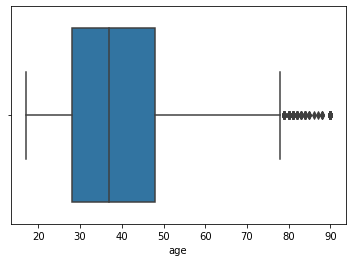

In [20]:
sns.boxplot(df['age'])

In [21]:
q1=df['age'].quantile(0.25)

In [22]:
q3=df['age'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
higher=q3+1.5*IQR

In [26]:
df=df[(df['age']>lower) & (df['age']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

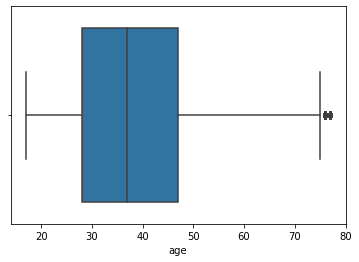

In [27]:
sns.boxplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

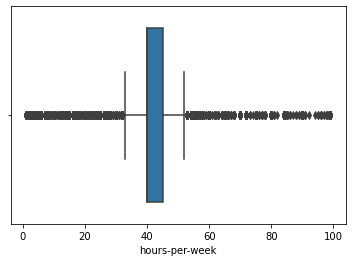

In [28]:
sns.boxplot(df['hours-per-week'])

In [29]:
q1=df['hours-per-week'].quantile(0.25)

In [30]:
q3=df['hours-per-week'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
higher=q3+1.5*IQR

In [34]:
df=df[(df['hours-per-week']>lower) & (df['hours-per-week']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

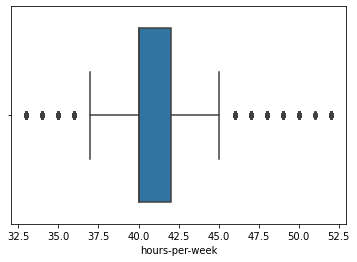

In [35]:
sns.boxplot(df['hours-per-week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

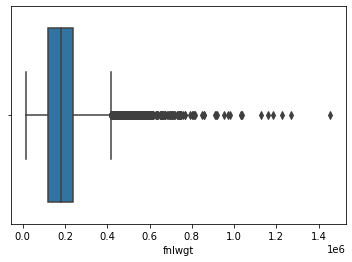

In [36]:
sns.boxplot(df['fnlwgt'])

In [37]:
q1=df['fnlwgt'].quantile(0.25)

In [38]:
q3=df['fnlwgt'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
higher=q3+1.5*IQR

In [42]:
df=df[(df['fnlwgt']>lower) & (df['fnlwgt']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

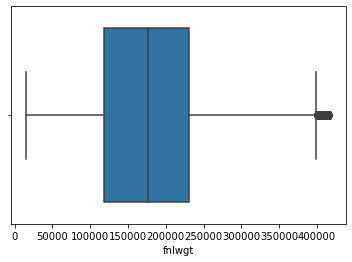

In [43]:
sns.boxplot(df['fnlwgt'])

In [44]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='workclass', ylabel='count'>

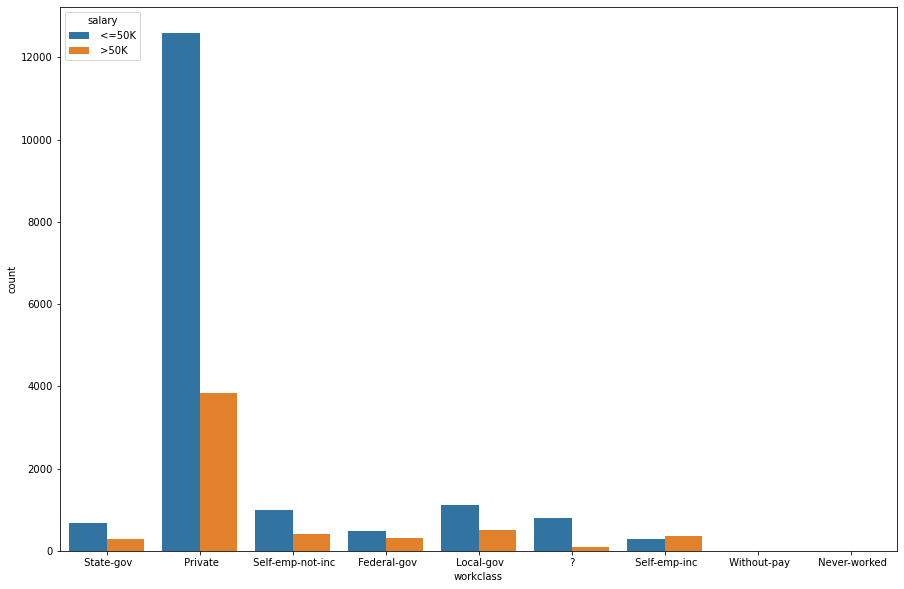

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['workclass'],hue=df['salary'])

In [46]:
label_df=df.groupby("workclass")['salary'].value_counts().sort_values().index

In [47]:
val_df=df.groupby("workclass")['salary'].value_counts().sort_values().values

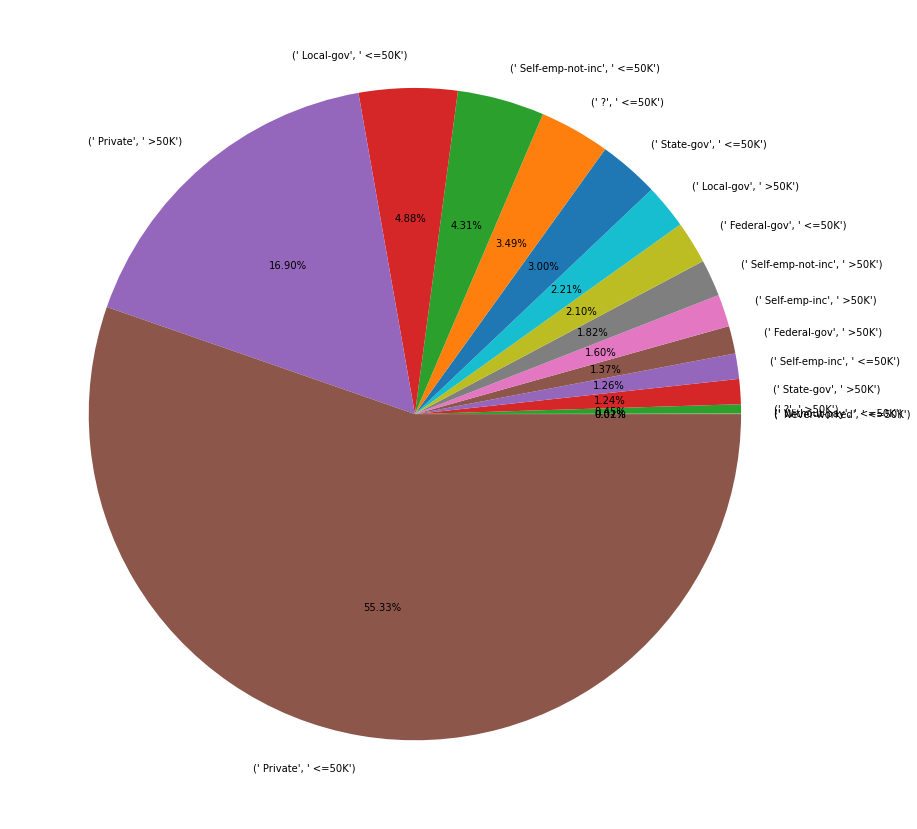

In [48]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [49]:
df.groupby("workclass")['salary'].value_counts()

workclass          salary
 ?                  <=50K      795
                    >50K       103
 Federal-gov        <=50K      479
                    >50K       311
 Local-gov          <=50K     1110
                    >50K       503
 Never-worked       <=50K        3
 Private            <=50K    12591
                    >50K      3847
 Self-emp-inc       >50K       364
                    <=50K      286
 Self-emp-not-inc   <=50K      982
                    >50K       415
 State-gov          <=50K      683
                    >50K       282
 Without-pay        <=50K        4
Name: salary, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

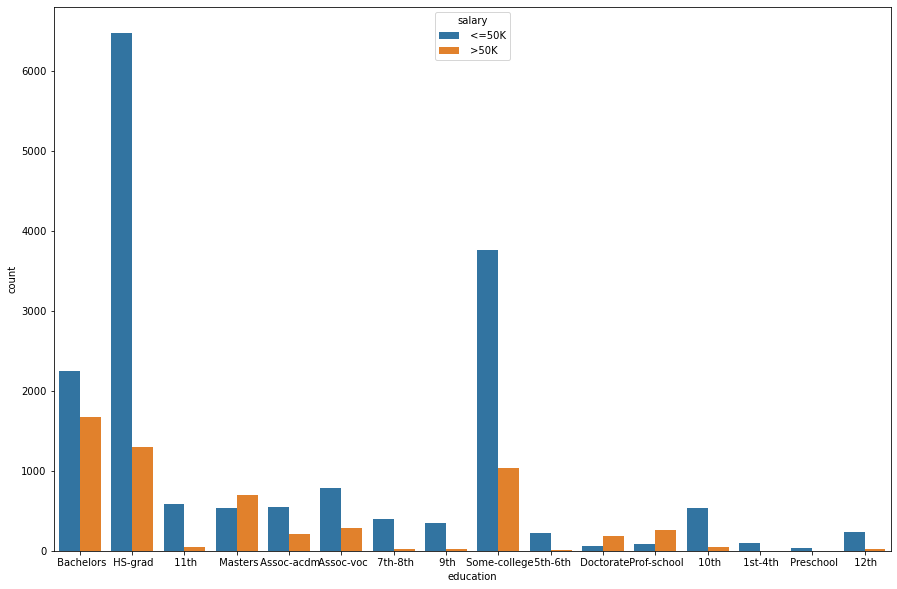

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['education'],hue=df['salary'])

In [51]:
label_df=df.groupby("education")['salary'].value_counts().sort_values().index

In [52]:
val_df=df.groupby("education")['salary'].value_counts().sort_values().values

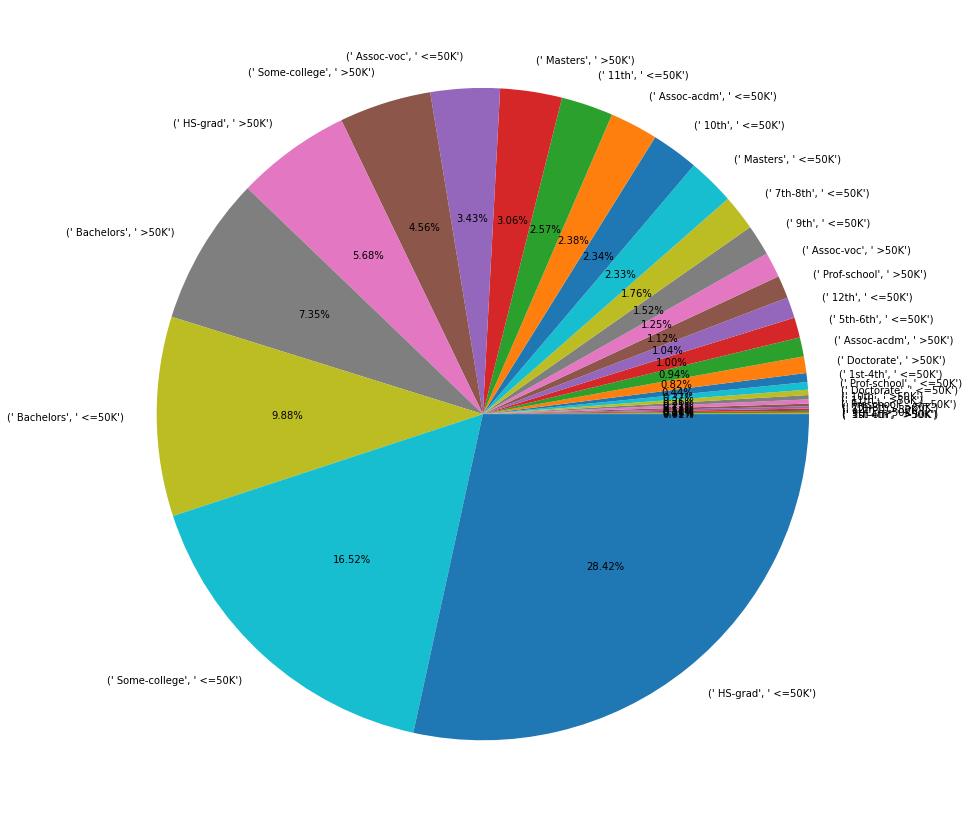

In [53]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [54]:
df.groupby("education")['salary'].value_counts()

education      salary
 10th           <=50K     532
                >50K       48
 11th           <=50K     586
                >50K       47
 12th           <=50K     236
                >50K       25
 1st-4th        <=50K     101
                >50K        3
 5th-6th        <=50K     227
                >50K       12
 7th-8th        <=50K     400
                >50K       25
 9th            <=50K     347
                >50K       22
 Assoc-acdm     <=50K     542
                >50K      215
 Assoc-voc      <=50K     780
                >50K      285
 Bachelors      <=50K    2249
                >50K     1673
 Doctorate      >50K      187
                <=50K      60
 HS-grad        <=50K    6468
                >50K     1293
 Masters        >50K      696
                <=50K     530
 Preschool      <=50K      30
 Prof-school    >50K      256
                <=50K      85
 Some-college   <=50K    3760
                >50K     1038
Name: salary, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital-status', ylabel='count'>

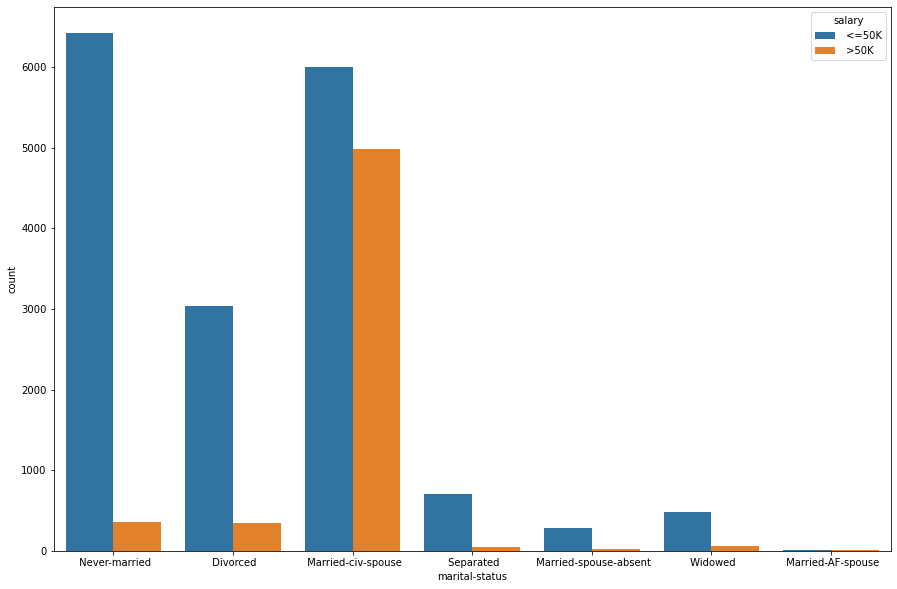

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(df['marital-status'],hue=df['salary'])

In [56]:
df.groupby("marital-status")['salary'].value_counts()

marital-status          salary
 Divorced                <=50K    3042
                         >50K      344
 Married-AF-spouse       >50K        9
                         <=50K       4
 Married-civ-spouse      <=50K    6001
                         >50K     4988
 Married-spouse-absent   <=50K     279
                         >50K       19
 Never-married           <=50K    6422
                         >50K      357
 Separated               <=50K     701
                         >50K       49
 Widowed                 <=50K     484
                         >50K       59
Name: salary, dtype: int64

In [57]:
label_df=df.groupby("marital-status")['salary'].value_counts().sort_values().index

In [58]:
val_df=df.groupby("marital-status")['salary'].value_counts().sort_values().values

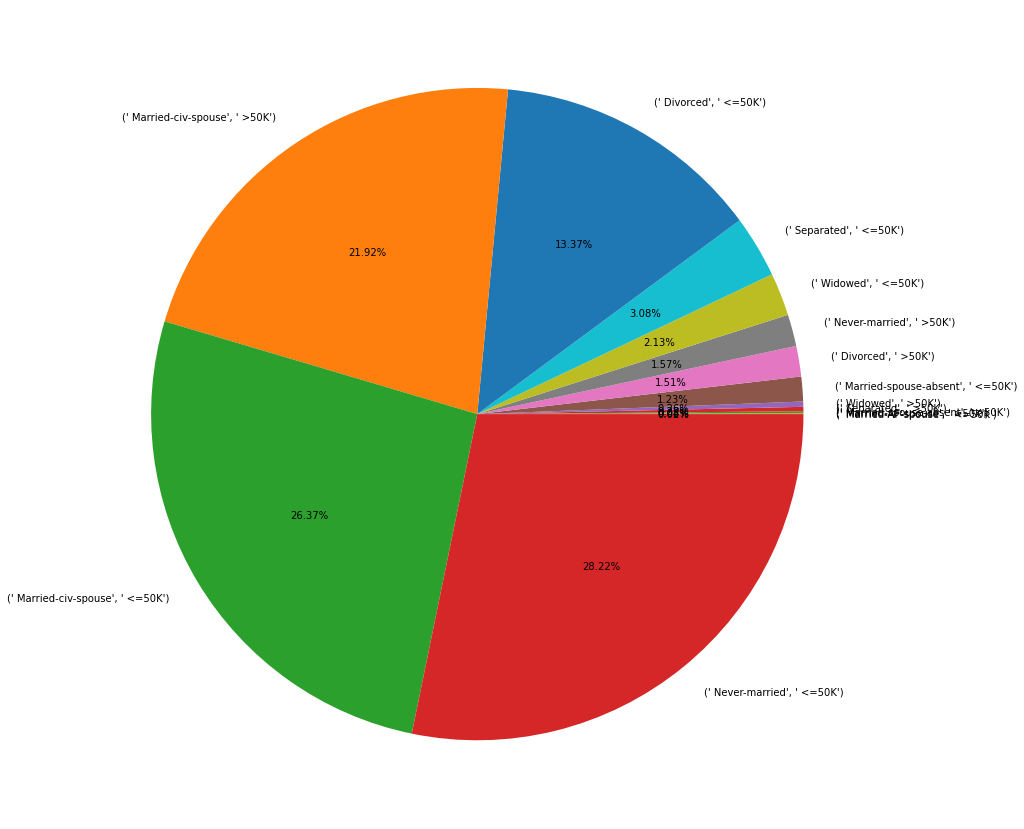

In [59]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

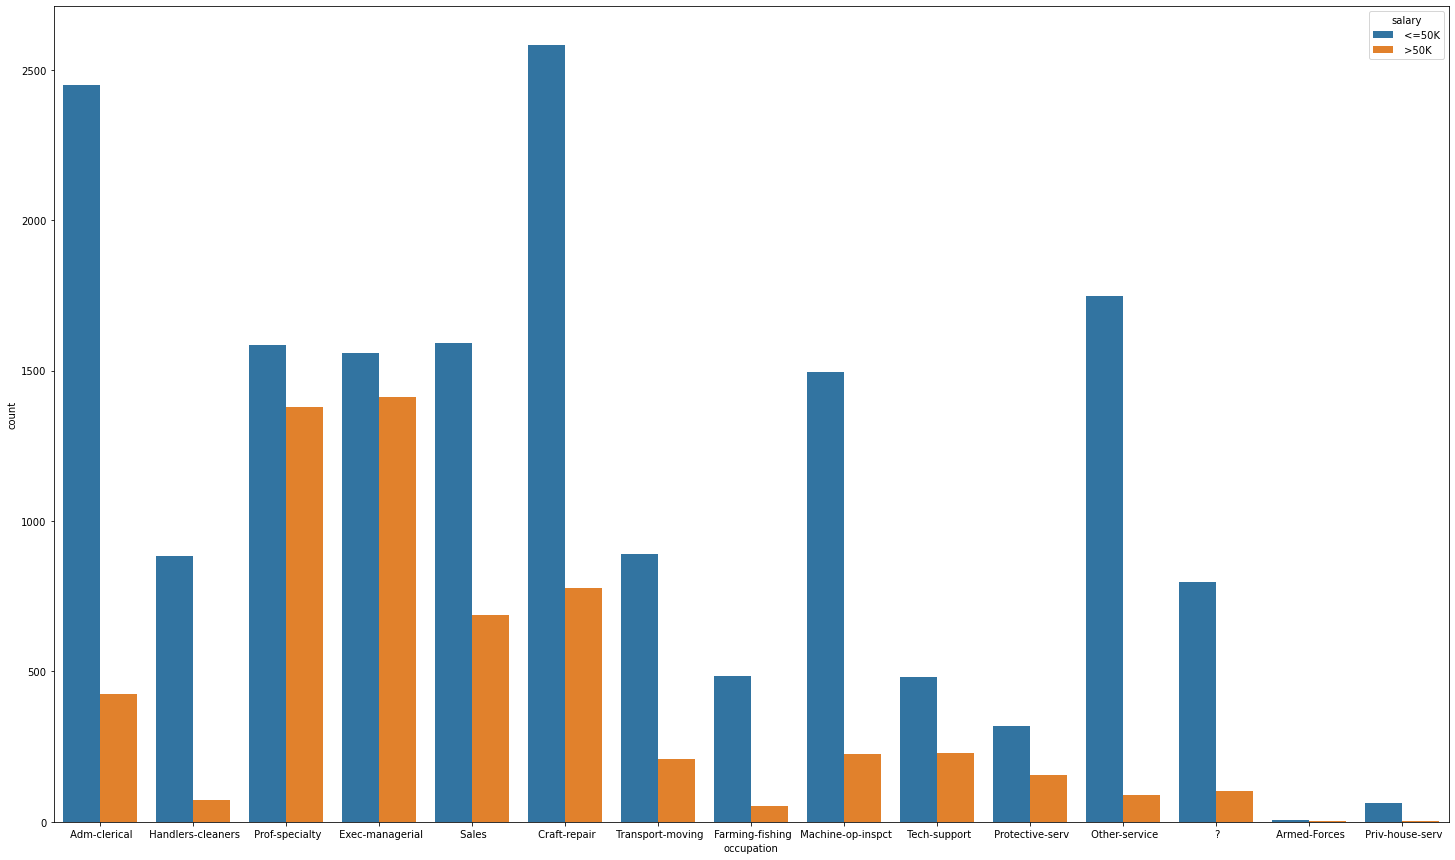

In [60]:
plt.figure(figsize=(25,15))
sns.countplot(df['occupation'],hue=df['salary'])

In [61]:
df.groupby("occupation")['salary'].value_counts()

occupation          salary
 ?                   <=50K     798
                     >50K      103
 Adm-clerical        <=50K    2450
                     >50K      425
 Armed-Forces        <=50K       6
                     >50K        1
 Craft-repair        <=50K    2582
                     >50K      778
 Exec-managerial     <=50K    1559
                     >50K     1413
 Farming-fishing     <=50K     484
                     >50K       52
 Handlers-cleaners   <=50K     884
                     >50K       74
 Machine-op-inspct   <=50K    1494
                     >50K      227
 Other-service       <=50K    1748
                     >50K       90
 Priv-house-serv     <=50K      64
                     >50K        1
 Prof-specialty      <=50K    1586
                     >50K     1378
 Protective-serv     <=50K     317
                     >50K      157
 Sales               <=50K    1592
                     >50K      688
 Tech-support        <=50K     480
                     >50K   

In [62]:
label_df=df.groupby("occupation")['salary'].value_counts().sort_values().index

In [63]:
val_df=df.groupby("occupation")['salary'].value_counts().sort_values().values

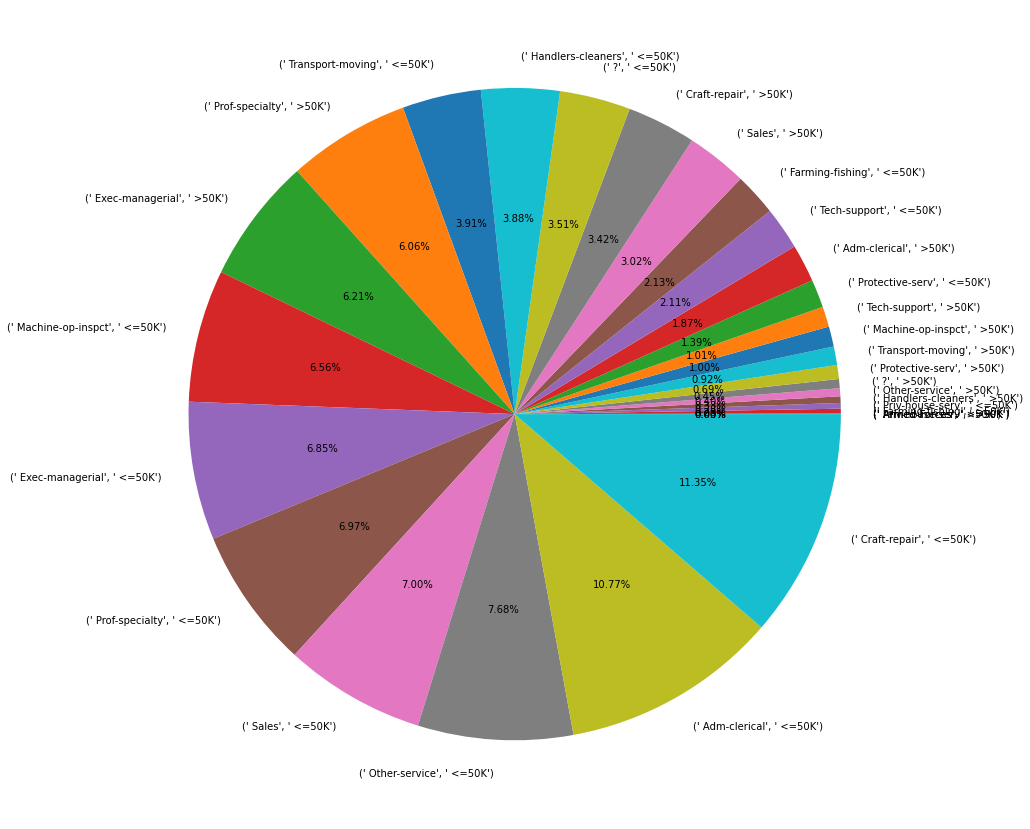

In [64]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='count'>

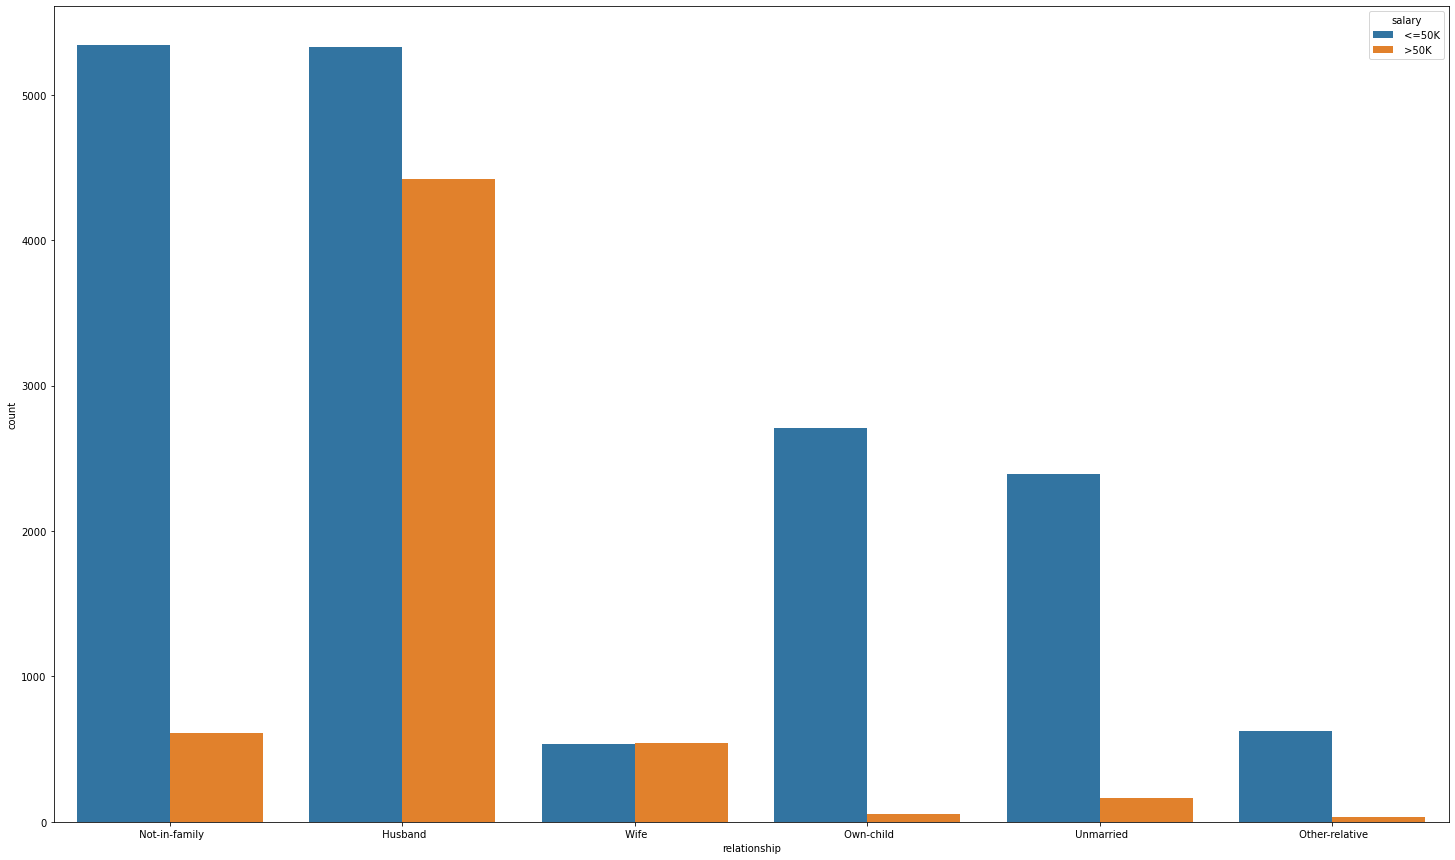

In [65]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['relationship'],hue=df['salary'])

In [66]:
df.groupby("relationship")['salary'].value_counts()

relationship     salary
 Husband          <=50K    5331
                  >50K     4424
 Not-in-family    <=50K    5342
                  >50K      614
 Other-relative   <=50K     622
                  >50K       30
 Own-child        <=50K    2709
                  >50K       53
 Unmarried        <=50K    2394
                  >50K      162
 Wife             >50K      542
                  <=50K     535
Name: salary, dtype: int64

In [67]:
label_df=df.groupby("relationship")['salary'].value_counts().sort_values().index

In [68]:
val_df=df.groupby("relationship")['salary'].value_counts().sort_values().values

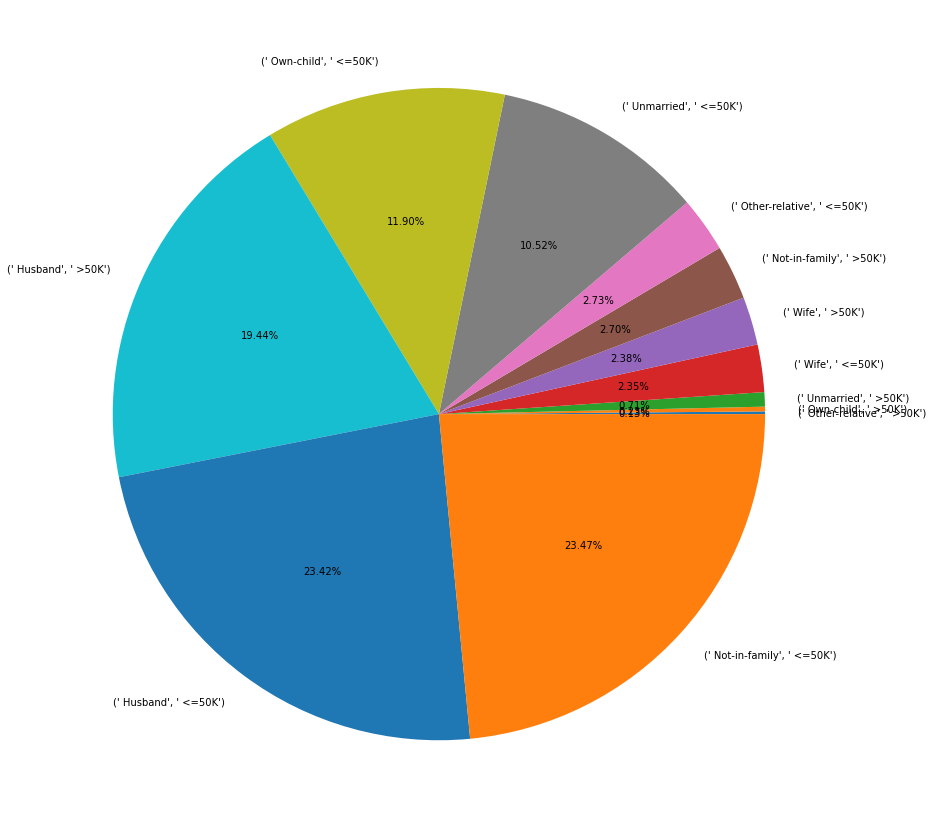

In [69]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

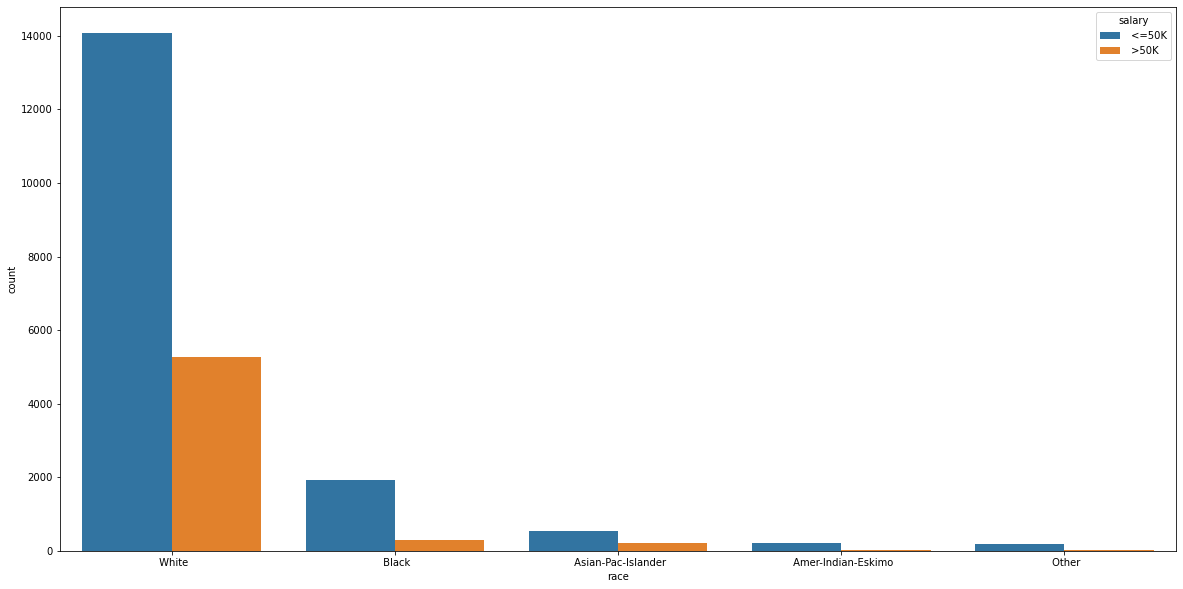

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(df['race'],hue=df['salary'])

In [71]:
df.groupby("race")['salary'].value_counts()

race                 salary
 Amer-Indian-Eskimo   <=50K      202
                      >50K        27
 Asian-Pac-Islander   <=50K      536
                      >50K       216
 Black                <=50K     1938
                      >50K       295
 Other                <=50K      181
                      >50K        19
 White                <=50K    14076
                      >50K      5268
Name: salary, dtype: int64

In [72]:
label_df=df.groupby("race")['salary'].value_counts().sort_values().index

In [73]:
val_df=df.groupby("race")['salary'].value_counts().sort_values().values

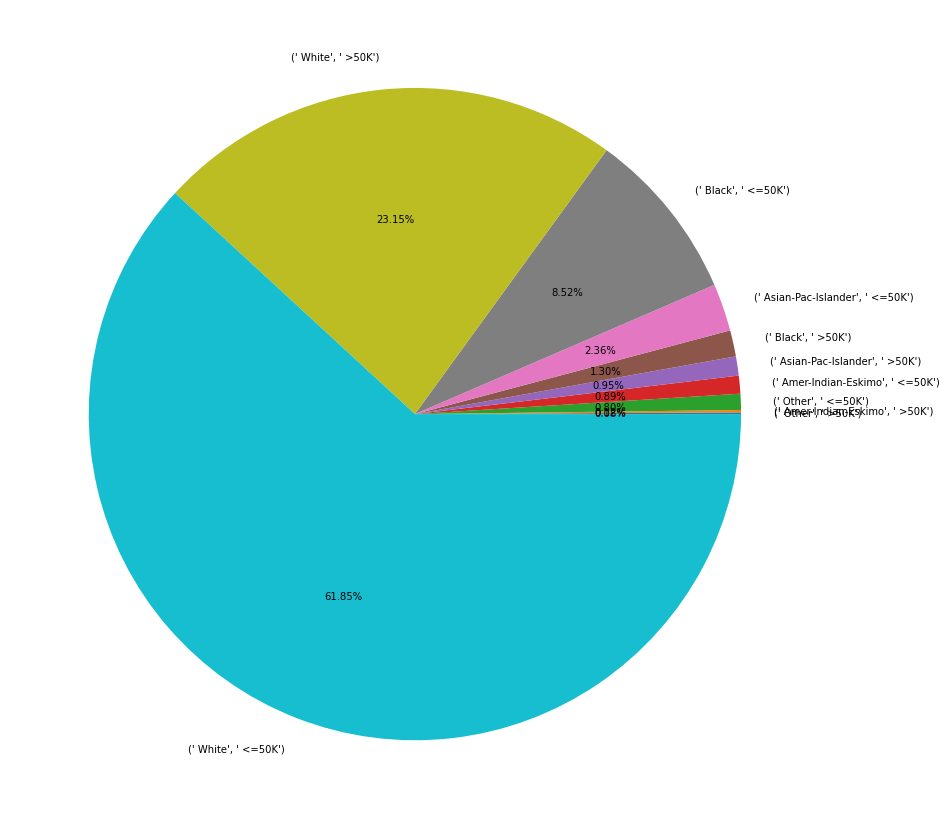

In [74]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='count'>

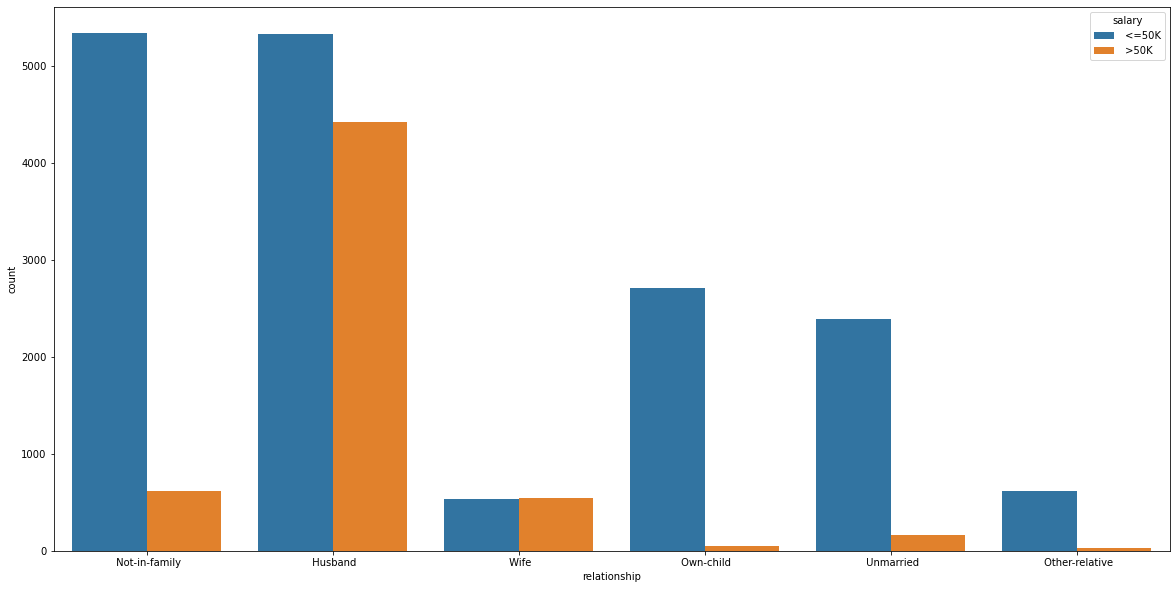

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['relationship'],hue=df['salary'])

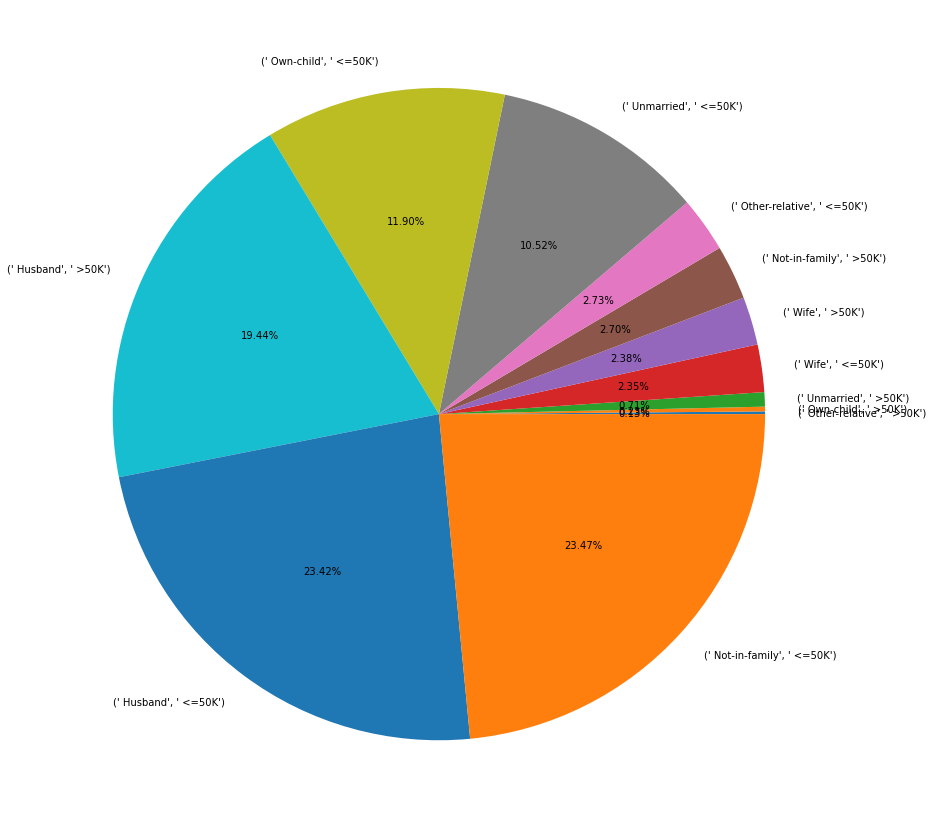

In [76]:
label_df=df.groupby("relationship")['salary'].value_counts().sort_values().index

val_df=df.groupby("relationship")['salary'].value_counts().sort_values().values

plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [77]:
df.groupby("age")['salary'].value_counts()

age  salary
17    <=50K     62
18    <=50K    140
19    <=50K    277
      >50K       1
20    <=50K    378
              ... 
75    >50K       5
76    <=50K      8
      >50K       3
77    <=50K      6
      >50K       2
Name: salary, Length: 119, dtype: int64

In [78]:
label_df=df.groupby("age")['salary'].value_counts().sort_values().index

In [79]:
val_df=df.groupby("age")['salary'].value_counts().sort_values().values

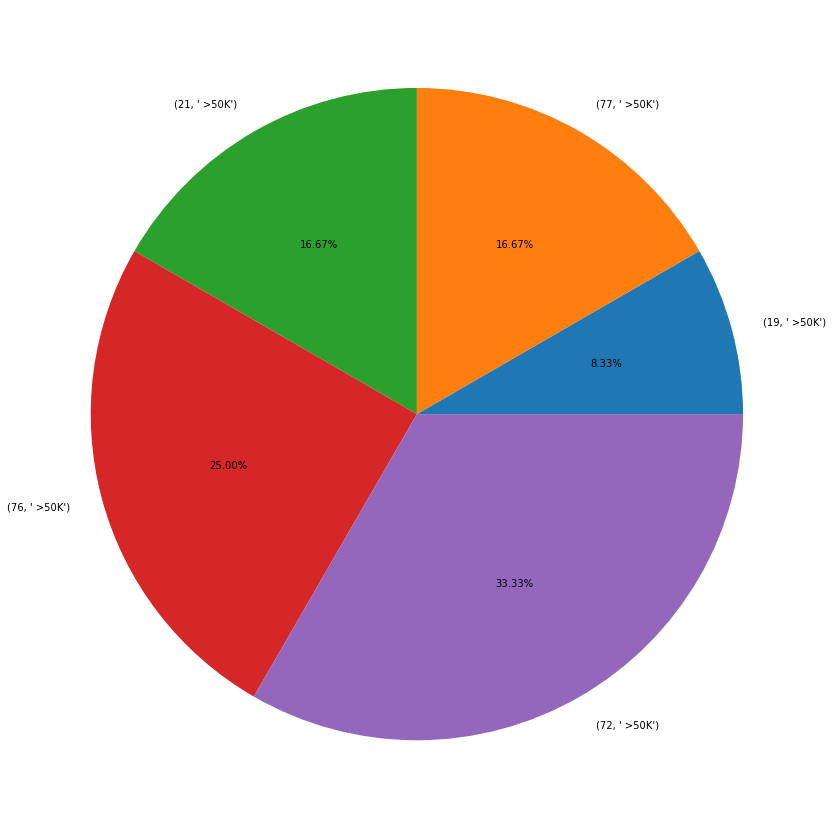

In [80]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='native-country', ylabel='count'>

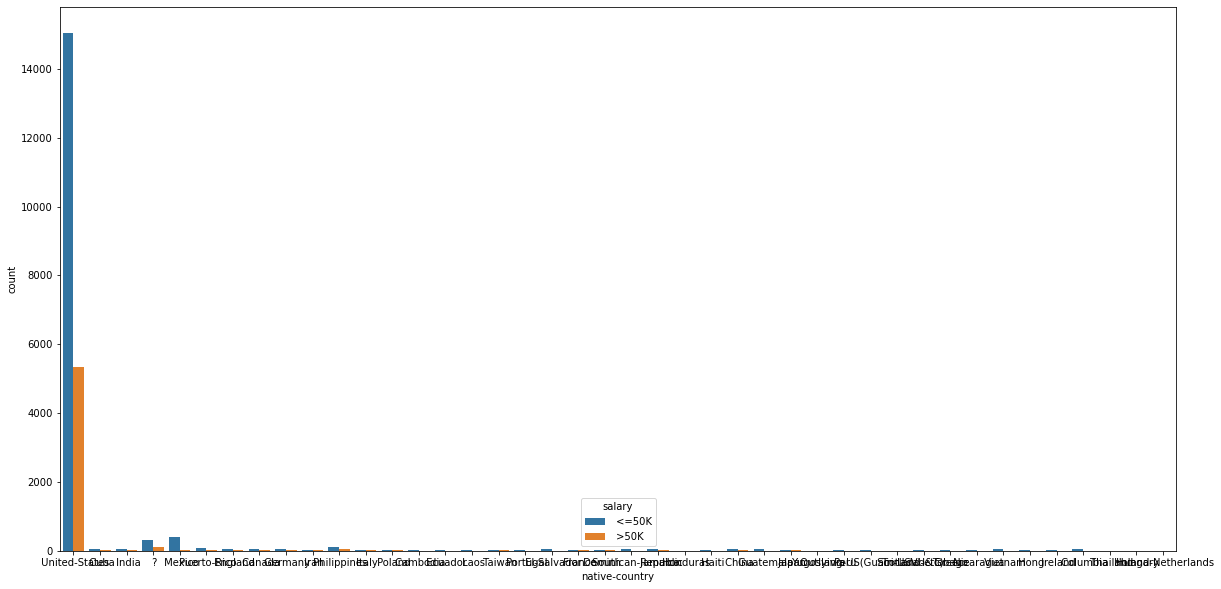

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(df['native-country'],hue=df['salary'])

In [82]:
df.groupby("native-country")['salary'].value_counts()

native-country  salary
 ?               <=50K     302
                 >50K      109
 Cambodia        <=50K      12
                 >50K        7
 Canada          <=50K      52
                          ... 
 United-States   >50K     5327
 Vietnam         <=50K      47
                 >50K        5
 Yugoslavia      <=50K       7
                 >50K        4
Name: salary, Length: 81, dtype: int64

In [83]:
label_df=df.groupby("native-country")['salary'].value_counts().sort_values().index

In [84]:
val_df=df.groupby("native-country")['salary'].value_counts().sort_values().values

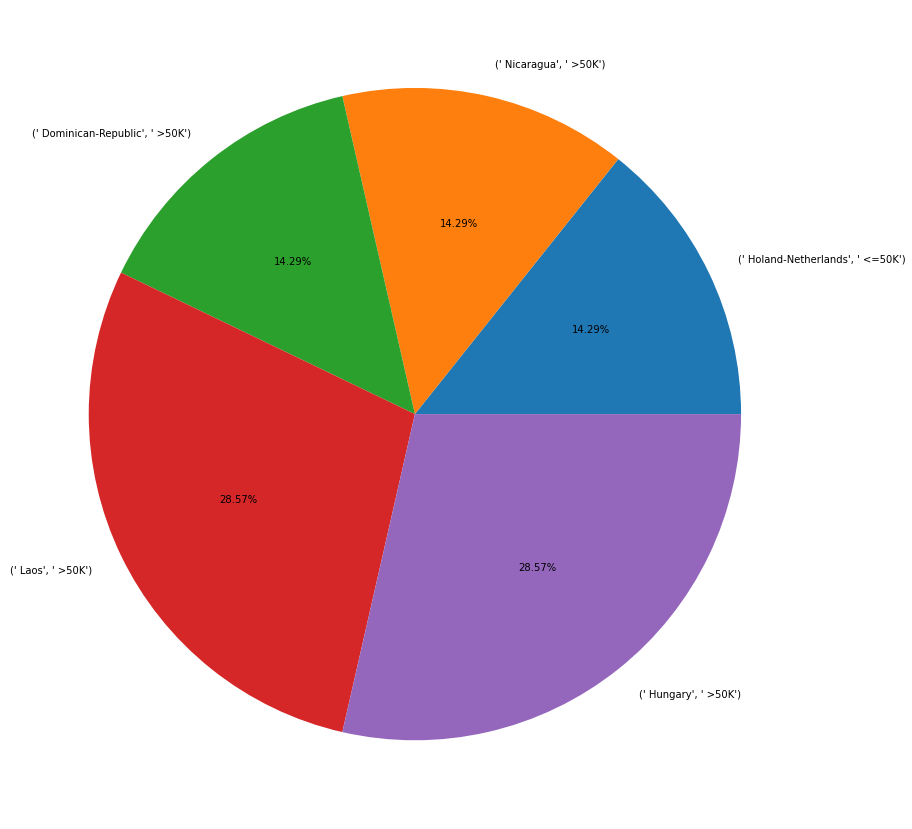

In [85]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

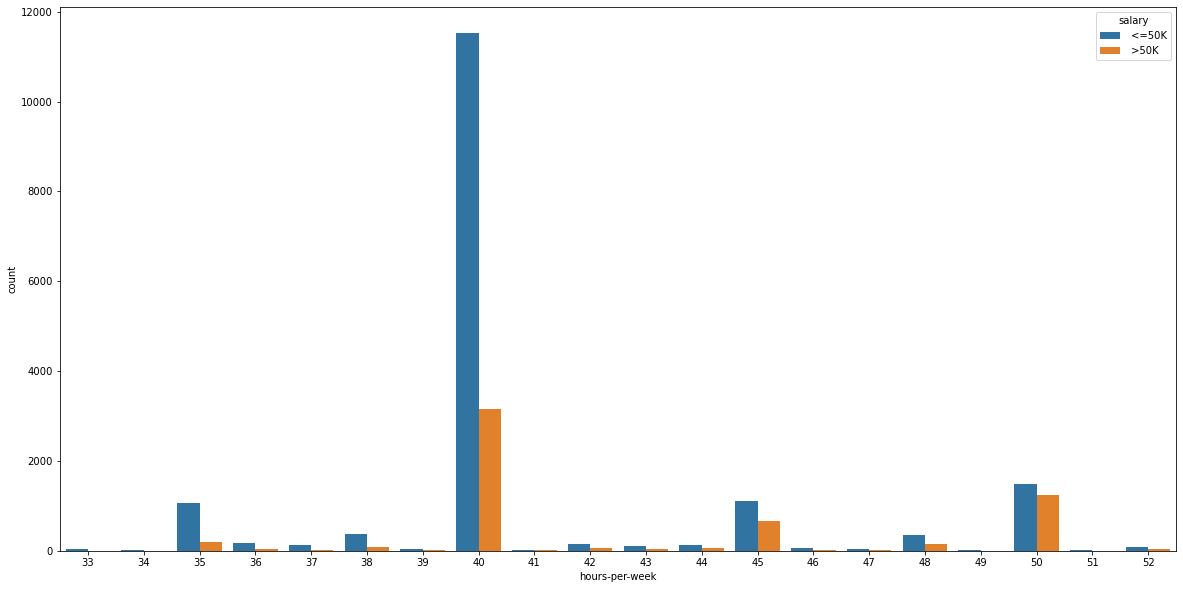

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(df['hours-per-week'],hue=df['salary'])

In [87]:
df.groupby("hours-per-week")['salary'].value_counts()

hours-per-week  salary
33               <=50K       32
                 >50K         4
34               <=50K       26
                 >50K         2
35               <=50K     1061
                 >50K       192
36               <=50K      171
                 >50K        40
37               <=50K      126
                 >50K        20
38               <=50K      382
                 >50K        81
39               <=50K       29
                 >50K         7
40               <=50K    11526
                 >50K      3154
41               <=50K       27
                 >50K         7
42               <=50K      146
                 >50K        69
43               <=50K      110
                 >50K        38
44               <=50K      136
                 >50K        71
45               <=50K     1107
                 >50K       660
46               <=50K       53
                 >50K        27
47               <=50K       32
                 >50K        15
48               

In [88]:
label_df=df.groupby("hours-per-week")['salary'].value_counts().sort_values().index

In [89]:
val_df=df.groupby("hours-per-week")['salary'].value_counts().sort_values().values

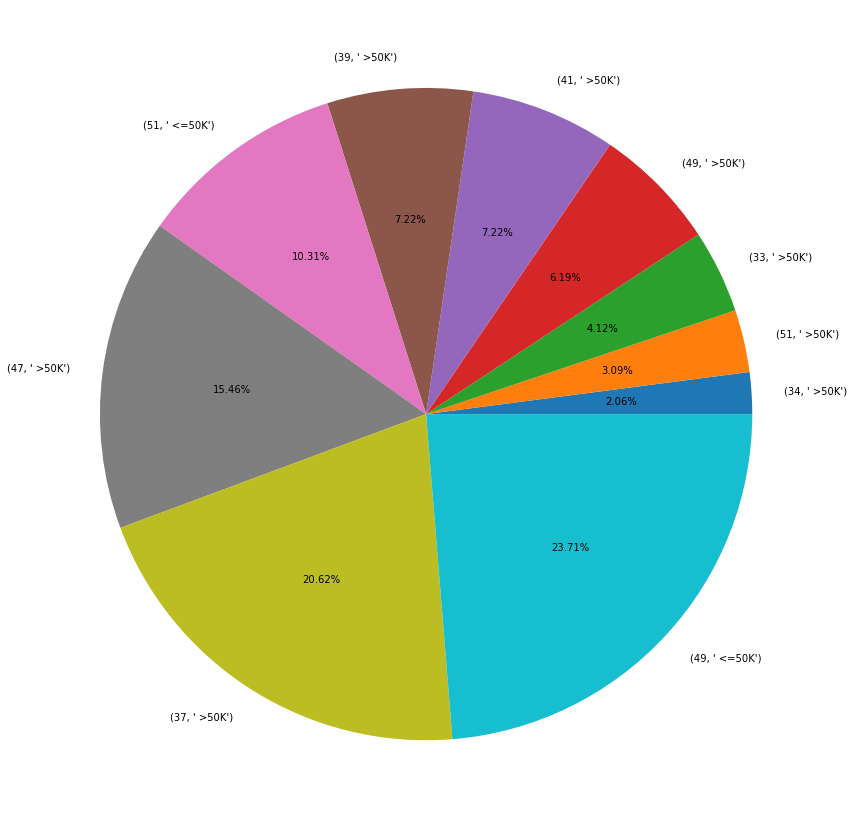

In [90]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='count'>

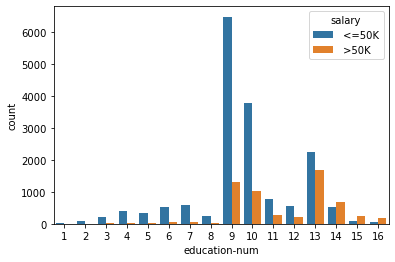

In [91]:
sns.countplot(df['education-num'],hue=df['salary'])

In [92]:
df.groupby("education-num")['salary'].value_counts()

education-num  salary
1               <=50K      30
2               <=50K     101
                >50K        3
3               <=50K     227
                >50K       12
4               <=50K     400
                >50K       25
5               <=50K     347
                >50K       22
6               <=50K     532
                >50K       48
7               <=50K     586
                >50K       47
8               <=50K     236
                >50K       25
9               <=50K    6468
                >50K     1293
10              <=50K    3760
                >50K     1038
11              <=50K     780
                >50K      285
12              <=50K     542
                >50K      215
13              <=50K    2249
                >50K     1673
14              >50K      696
                <=50K     530
15              >50K      256
                <=50K      85
16              >50K      187
                <=50K      60
Name: salary, dtype: int64

In [93]:
label_df=df.groupby("education-num")['salary'].value_counts().sort_values().index

In [94]:
val_df=df.groupby("education-num")['salary'].value_counts().sort_values().values

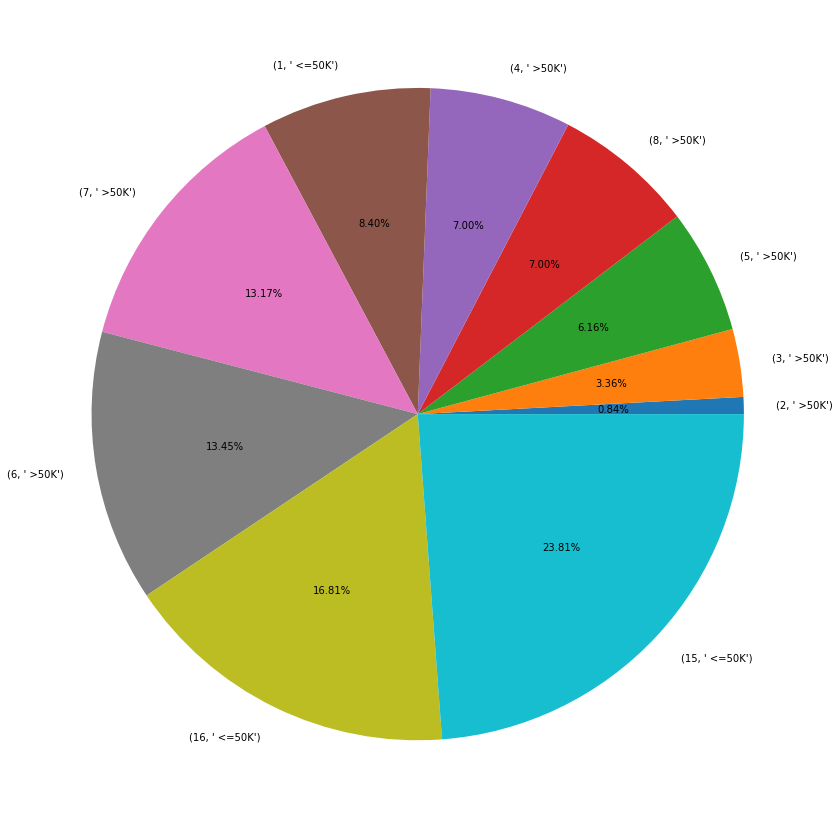

In [95]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [96]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='sex', ylabel='age'>

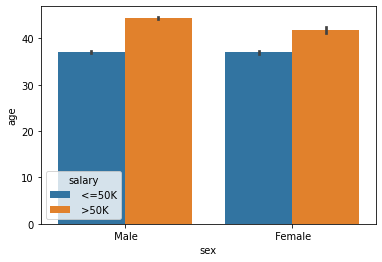

In [97]:
sns.barplot(x='sex',y='age',data=df,hue='salary')

In [98]:
df.groupby(["sex","salary"])['age'].mean()

sex      salary
 Female   <=50K    36.986151
          >50K     41.760092
 Male     <=50K    37.090602
          >50K     44.429609
Name: age, dtype: float64

In [99]:
label_df=df.groupby(["sex","salary"])['age'].mean().sort_values().index

In [100]:
val_df=df.groupby(["sex","salary"])['age'].mean().sort_values().values

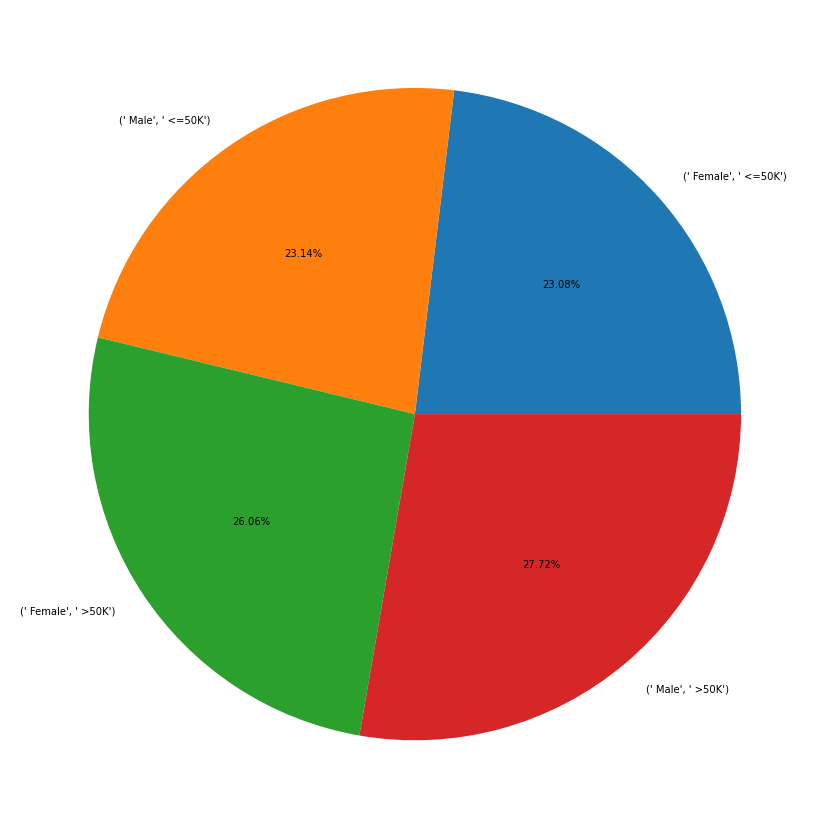

In [101]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='race', ylabel='age'>

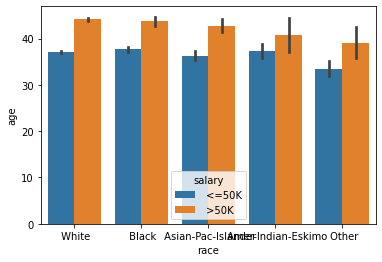

In [102]:
sns.barplot(x='race',y='age',data=df,hue='salary')

In [103]:
df.groupby(["race","salary"])['age'].mean()

race                 salary
 Amer-Indian-Eskimo   <=50K    37.301980
                      >50K     40.851852
 Asian-Pac-Islander   <=50K    36.343284
                      >50K     42.657407
 Black                <=50K    37.676471
                      >50K     43.759322
 Other                <=50K    33.486188
                      >50K     39.052632
 White                <=50K    37.035095
                      >50K     44.138193
Name: age, dtype: float64

In [104]:
label_df=df.groupby(["race","salary"])['age'].mean().sort_values().index

In [105]:
val_df=df.groupby(["race","salary"])['age'].mean().sort_values().values

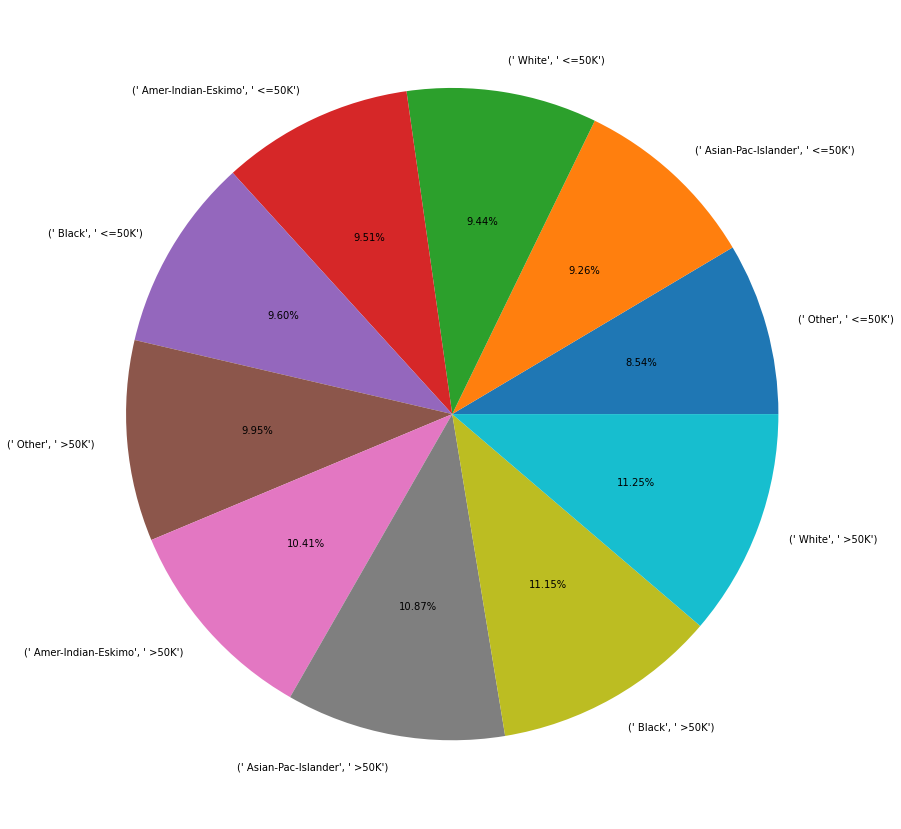

In [106]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='education', ylabel='age'>

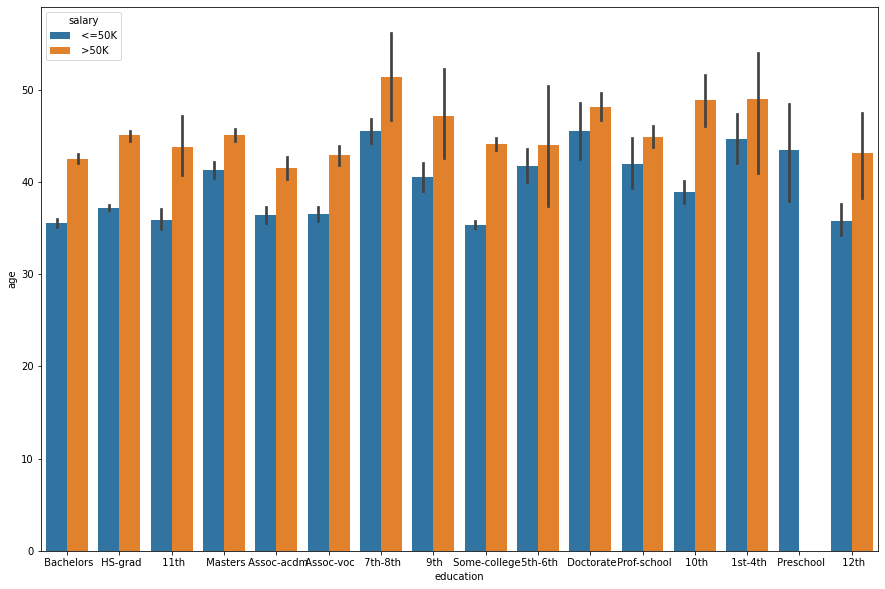

In [107]:
plt.figure(figsize=(15,10))
sns.barplot(x='education',y='age',data=df,hue='salary')

In [108]:
df.groupby(["education","salary"])['age'].mean()

education      salary
 10th           <=50K    38.904135
                >50K     48.895833
 11th           <=50K    35.897611
                >50K     43.808511
 12th           <=50K    35.788136
                >50K     43.080000
 1st-4th        <=50K    44.663366
                >50K     49.000000
 5th-6th        <=50K    41.726872
                >50K     44.000000
 7th-8th        <=50K    45.550000
                >50K     51.400000
 9th            <=50K    40.564841
                >50K     47.181818
 Assoc-acdm     <=50K    36.439114
                >50K     41.516279
 Assoc-voc      <=50K    36.503846
                >50K     42.856140
 Bachelors      <=50K    35.546020
                >50K     42.486551
 Doctorate      <=50K    45.550000
                >50K     48.085561
 HS-grad        <=50K    37.182900
                >50K     45.019335
 Masters        <=50K    41.279245
                >50K     45.045977
 Preschool      <=50K    43.500000
 Prof-school    <=50K    41.96470

In [109]:
label_df=df.groupby(["education","salary"])['age'].mean().sort_values().index

In [110]:
val_df=df.groupby(["education","salary"])['age'].mean().sort_values().values

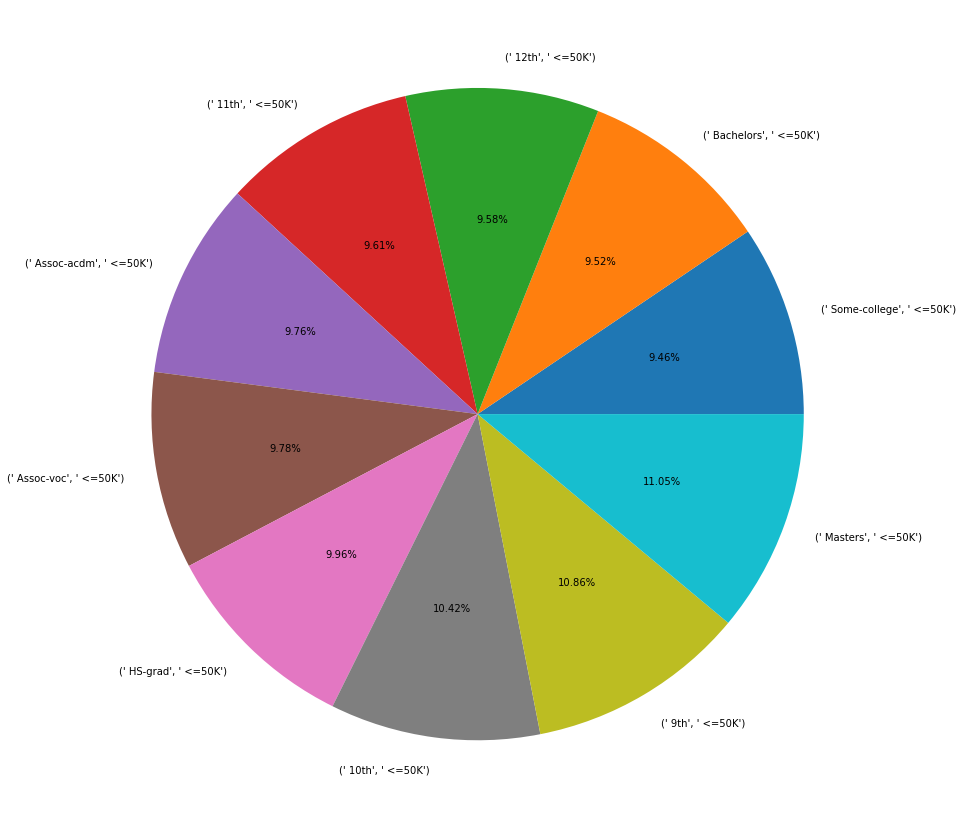

In [111]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='occupation', ylabel='age'>

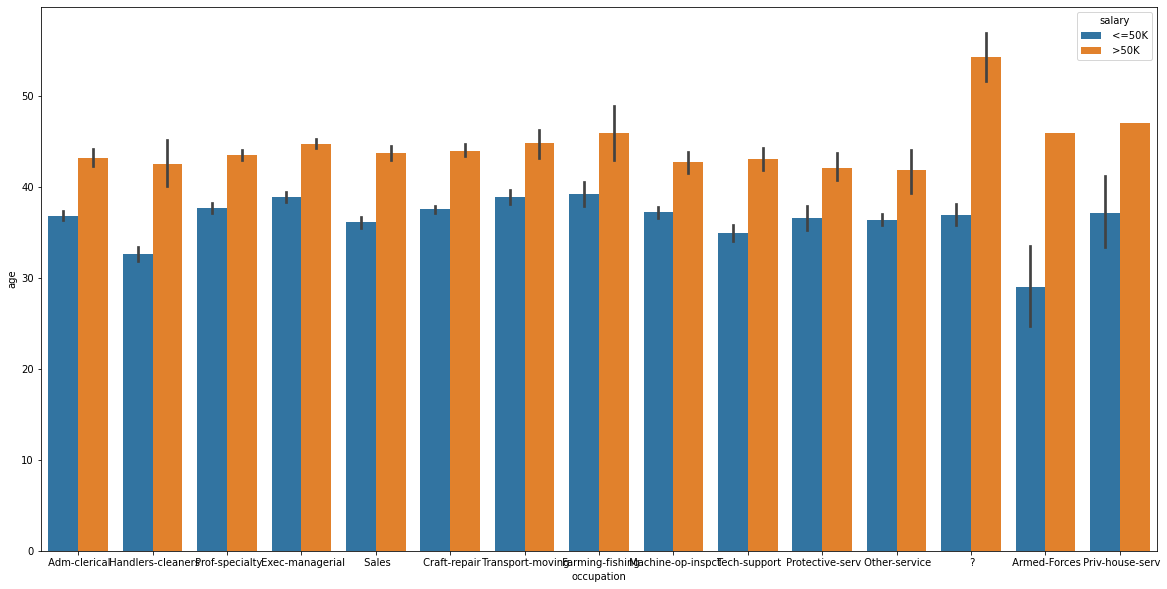

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(x='occupation',y='age',data=df,hue='salary')

In [113]:
df.groupby(["occupation","salary"])['age'].mean()

occupation          salary
 ?                   <=50K    36.959900
                     >50K     54.271845
 Adm-clerical        <=50K    36.863673
                     >50K     43.240000
 Armed-Forces        <=50K    29.000000
                     >50K     46.000000
 Craft-repair        <=50K    37.558482
                     >50K     44.010283
 Exec-managerial     <=50K    38.913406
                     >50K     44.762208
 Farming-fishing     <=50K    39.216942
                     >50K     45.980769
 Handlers-cleaners   <=50K    32.659502
                     >50K     42.540541
 Machine-op-inspct   <=50K    37.227577
                     >50K     42.731278
 Other-service       <=50K    36.431350
                     >50K     41.833333
 Priv-house-serv     <=50K    37.171875
                     >50K     47.000000
 Prof-specialty      <=50K    37.667087
                     >50K     43.542816
 Protective-serv     <=50K    36.640379
                     >50K     42.127389
 Sales       

In [114]:
label_df=df.groupby(["occupation","salary"])['age'].mean().sort_values().index

In [115]:
val_df=df.groupby(["occupation","salary"])['age'].mean().sort_values().values

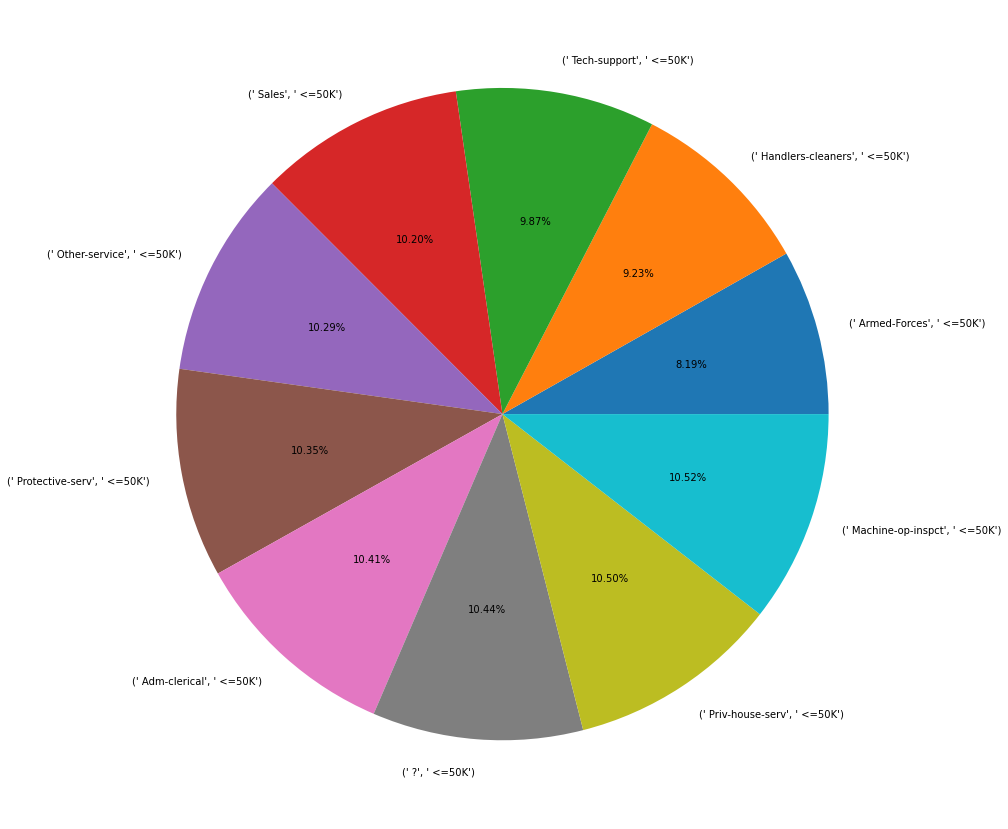

In [116]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='age'>

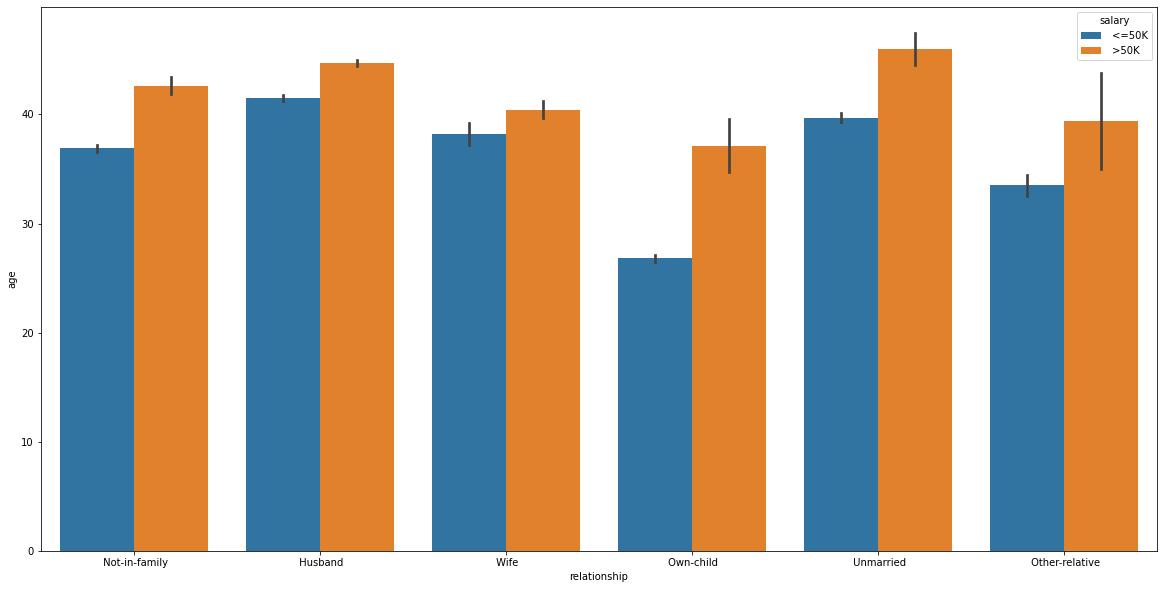

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(x='relationship',y='age',data=df,hue='salary')

In [118]:
df.groupby(["relationship","salary"])['age'].mean()

relationship     salary
 Husband          <=50K    41.508723
                  >50K     44.712703
 Not-in-family    <=50K    36.902284
                  >50K     42.648208
 Other-relative   <=50K    33.532154
                  >50K     39.366667
 Own-child        <=50K    26.805832
                  >50K     37.113208
 Unmarried        <=50K    39.704261
                  >50K     45.962963
 Wife             <=50K    38.239252
                  >50K     40.404059
Name: age, dtype: float64

In [119]:
label_df=df.groupby(["relationship","salary"])['age'].mean().sort_values().index

In [120]:
val_df=df.groupby(["relationship","salary"])['age'].mean().sort_values().values

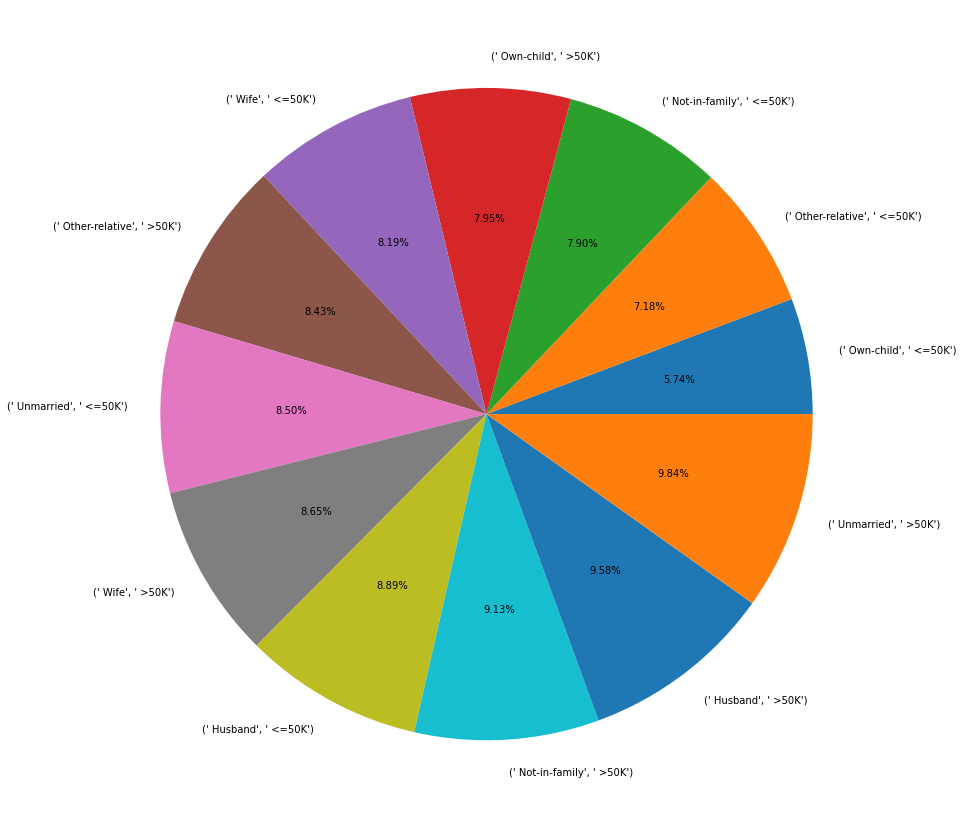

In [121]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

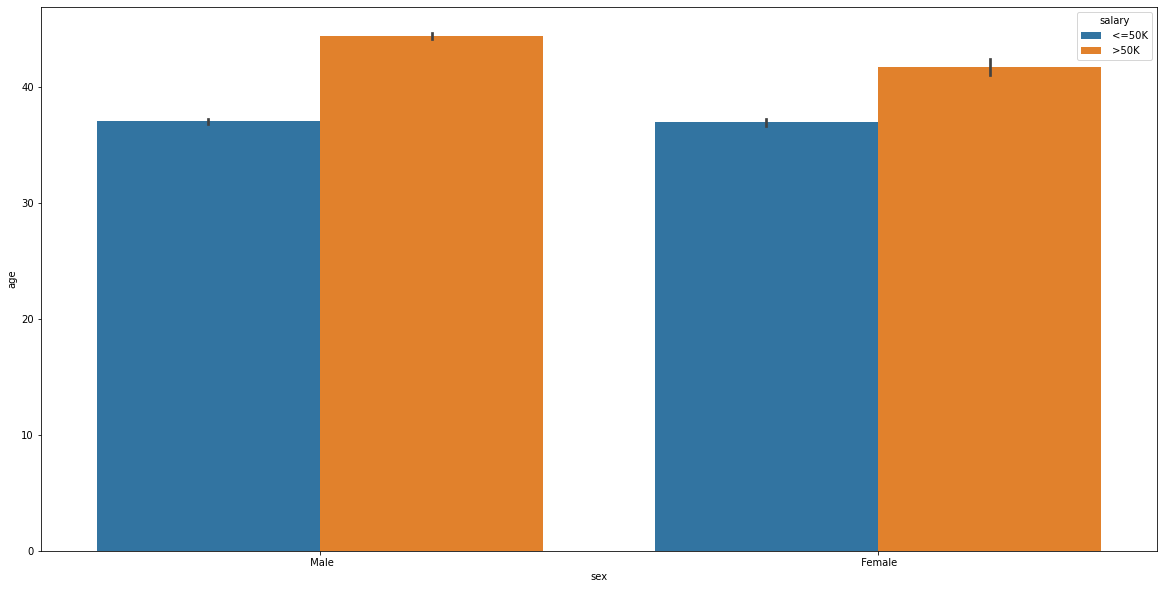

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x='sex',y='age',data=df,hue='salary')

In [123]:
df.groupby(["sex","salary"])['age'].mean()

sex      salary
 Female   <=50K    36.986151
          >50K     41.760092
 Male     <=50K    37.090602
          >50K     44.429609
Name: age, dtype: float64

In [124]:
label_df=df.groupby(["sex","salary"])['age'].mean().sort_values().index

In [125]:
val_df=df.groupby(["sex","salary"])['age'].mean().sort_values().values

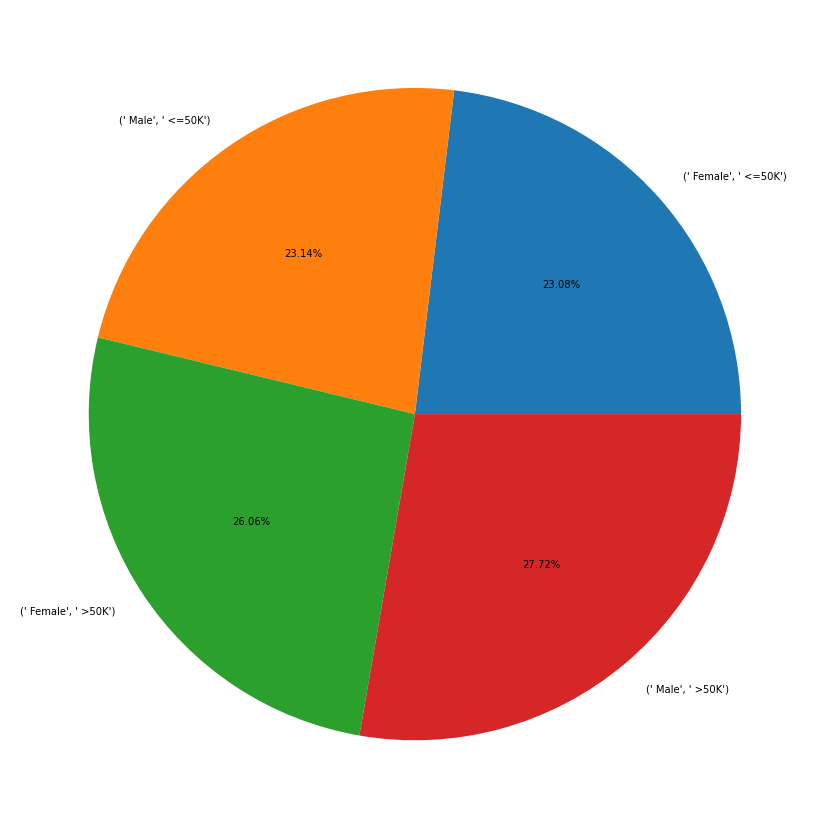

In [126]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='native-country', ylabel='age'>

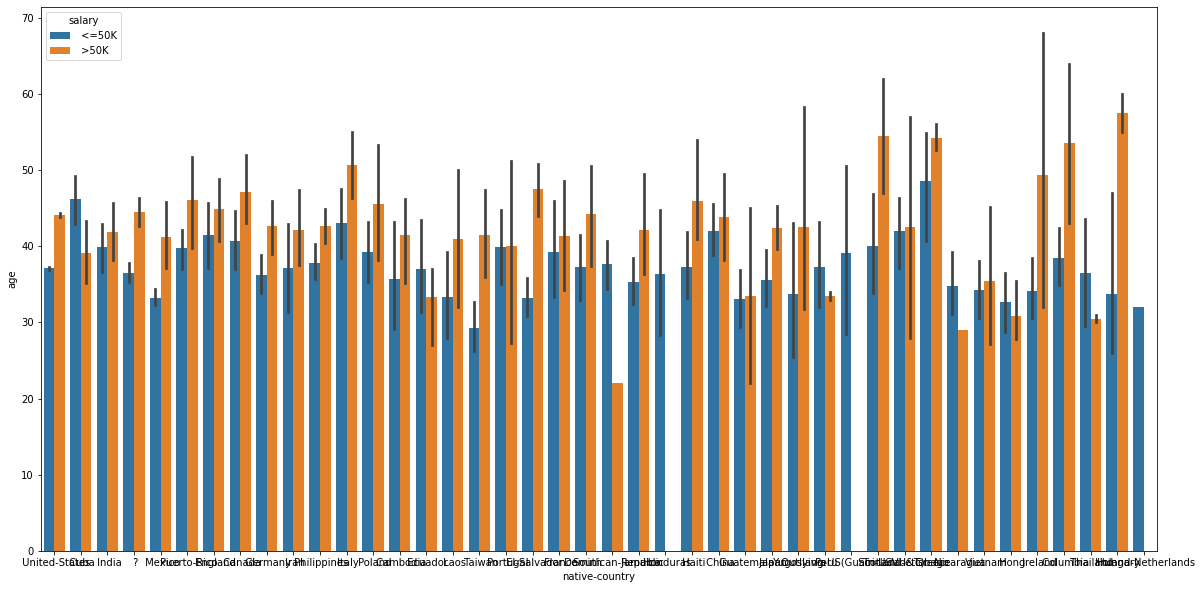

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(x='native-country',y='age',data=df,hue='salary')

In [128]:
df.groupby(["native-country","salary"])['age'].mean()

native-country  salary
 ?               <=50K    36.539735
                 >50K     44.467890
 Cambodia        <=50K    35.666667
                 >50K     41.428571
 Canada          <=50K    40.634615
                            ...    
 United-States   >50K     44.088605
 Vietnam         <=50K    34.319149
                 >50K     35.400000
 Yugoslavia      <=50K    33.714286
                 >50K     42.500000
Name: age, Length: 81, dtype: float64

In [129]:
label_df=df.groupby(["native-country","salary"])['age'].mean().sort_values().index

In [130]:
val_df=df.groupby(["native-country","salary"])['age'].mean().sort_values().values

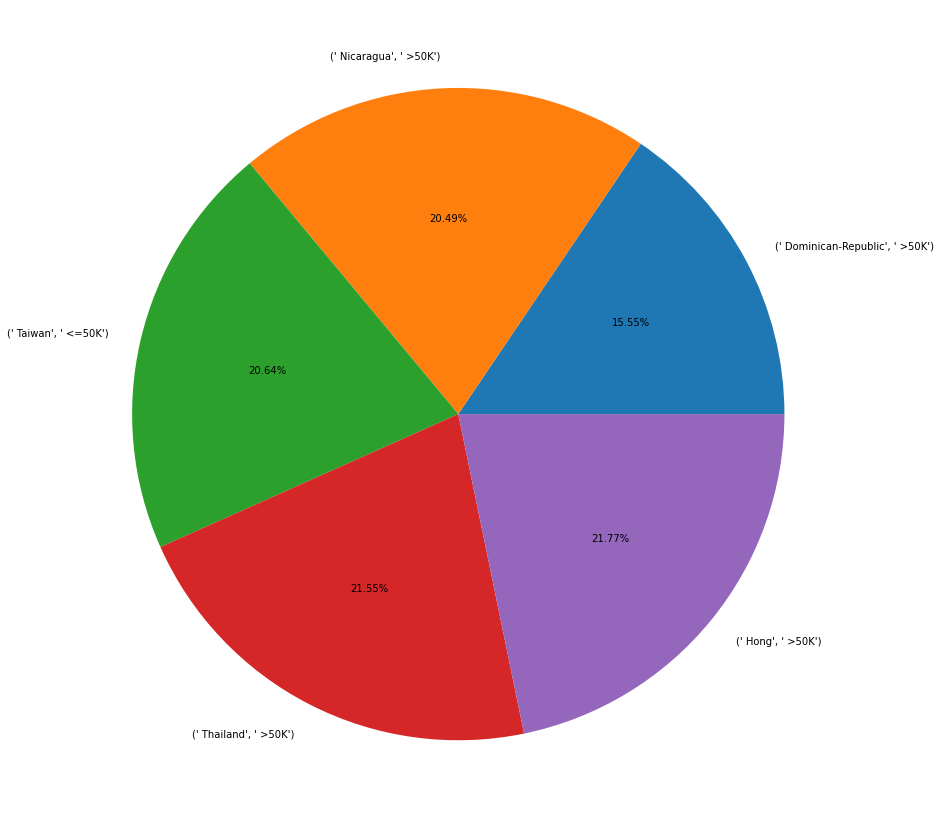

In [131]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='workclass', ylabel='age'>

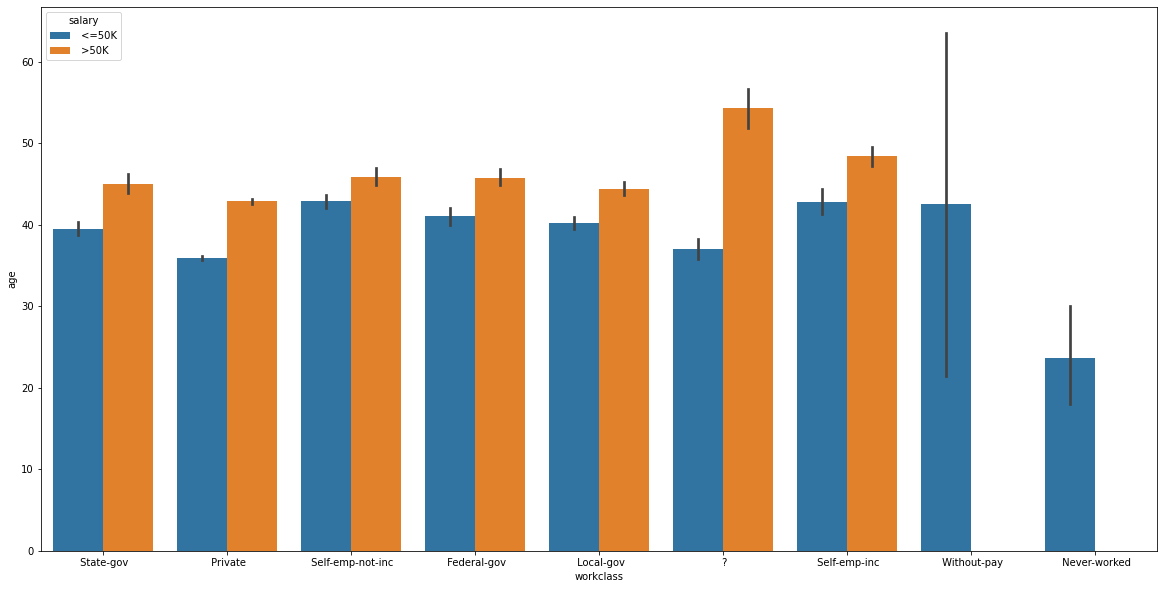

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(x='workclass',y='age',data=df,hue='salary')

In [133]:
df.groupby(["workclass","salary"])['age'].mean()

workclass          salary
 ?                  <=50K    37.010063
                    >50K     54.271845
 Federal-gov        <=50K    41.008351
                    >50K     45.784566
 Local-gov          <=50K    40.262162
                    >50K     44.437376
 Never-worked       <=50K    23.666667
 Private            <=50K    35.904932
                    >50K     42.884066
 Self-emp-inc       <=50K    42.842657
                    >50K     48.384615
 Self-emp-not-inc   <=50K    42.877800
                    >50K     45.853012
 State-gov          <=50K    39.477306
                    >50K     45.003546
 Without-pay        <=50K    42.500000
Name: age, dtype: float64

In [134]:
label_df=df.groupby(["workclass","salary"])['age'].mean().sort_values().index

In [135]:
val_df=df.groupby(["workclass","salary"])['age'].mean().sort_values().values

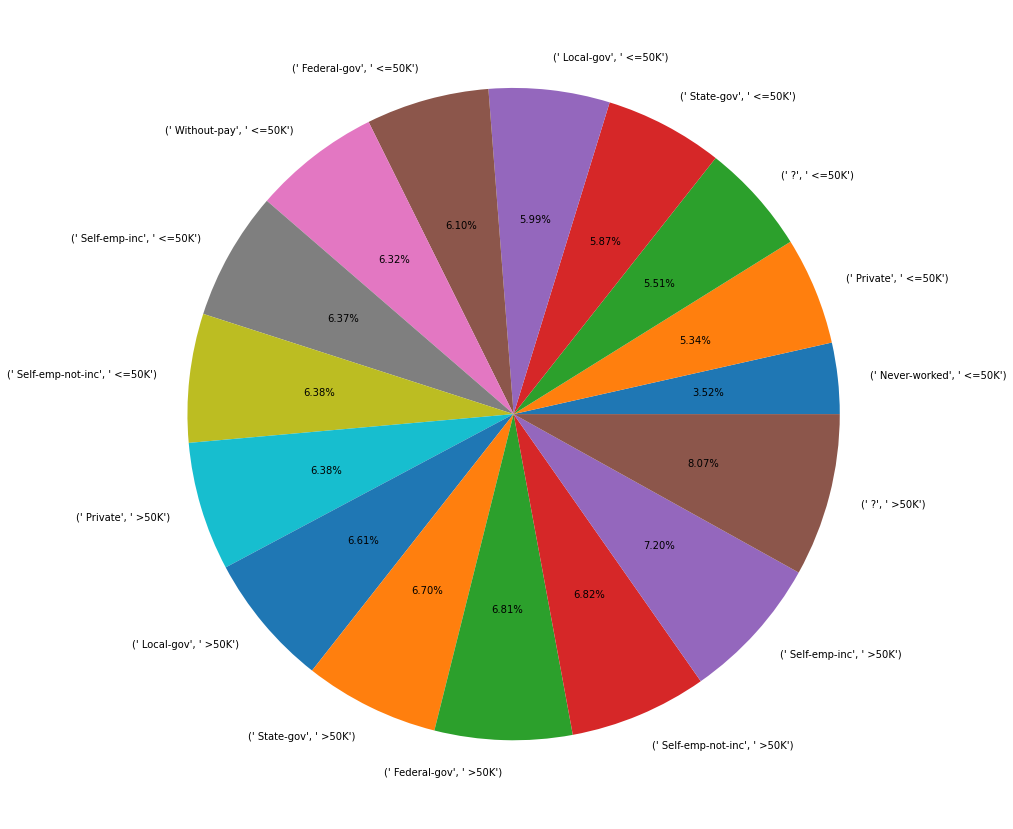

In [136]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='hours-per-week', ylabel='age'>

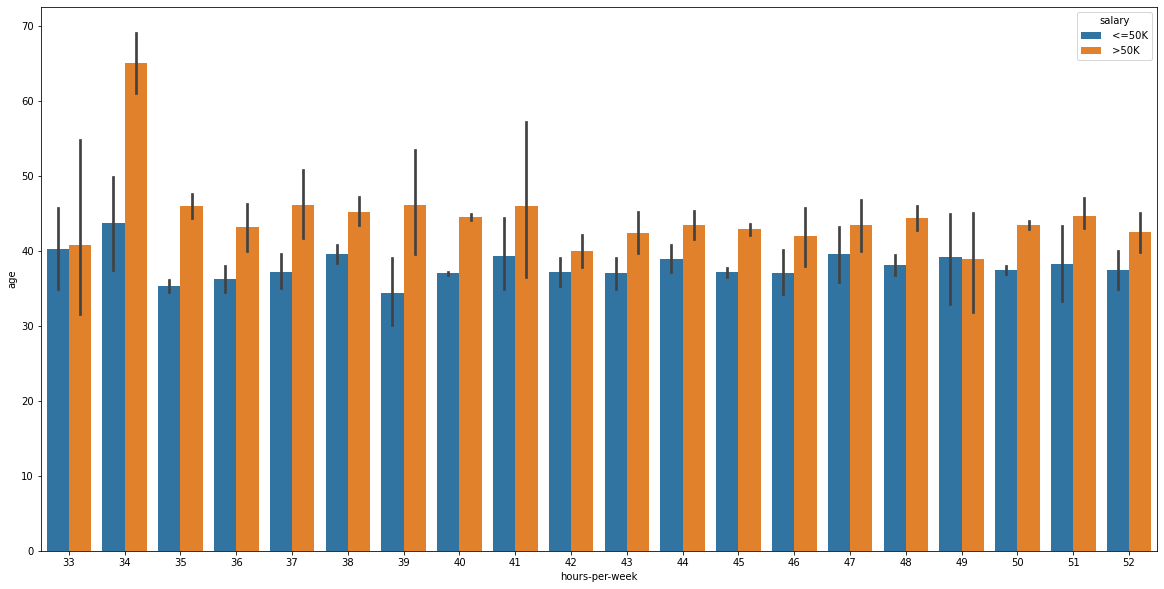

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x='hours-per-week',y='age',data=df,hue='salary')

In [138]:
df.groupby(["hours-per-week","salary"])['age'].mean()

hours-per-week  salary
33               <=50K    40.281250
                 >50K     40.750000
34               <=50K    43.692308
                 >50K     65.000000
35               <=50K    35.347785
                 >50K     45.921875
36               <=50K    36.257310
                 >50K     43.100000
37               <=50K    37.158730
                 >50K     46.100000
38               <=50K    39.568063
                 >50K     45.209877
39               <=50K    34.310345
                 >50K     46.142857
40               <=50K    36.996096
                 >50K     44.515853
41               <=50K    39.296296
                 >50K     46.000000
42               <=50K    37.164384
                 >50K     40.014493
43               <=50K    36.963636
                 >50K     42.394737
44               <=50K    38.845588
                 >50K     43.450704
45               <=50K    37.119241
                 >50K     42.846970
46               <=50K    36.981132
     

In [139]:
label_df=df.groupby(["hours-per-week","salary"])['age'].mean().sort_values().index

In [140]:
val_df=df.groupby(["hours-per-week","salary"])['age'].mean().sort_values().values

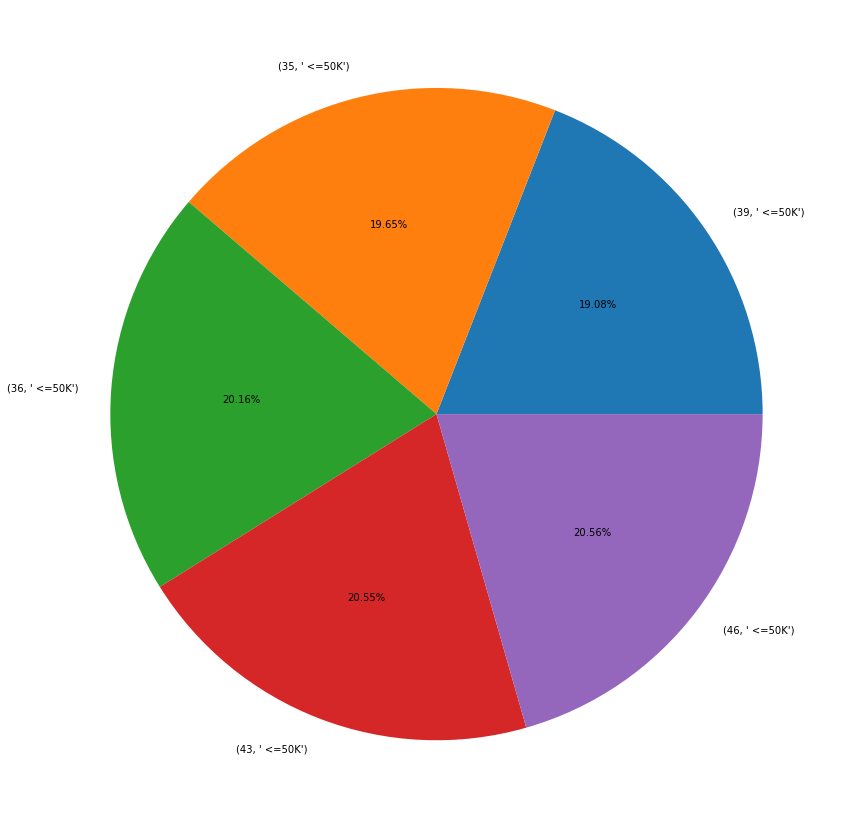

In [141]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

In [142]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='workclass', ylabel='age'>

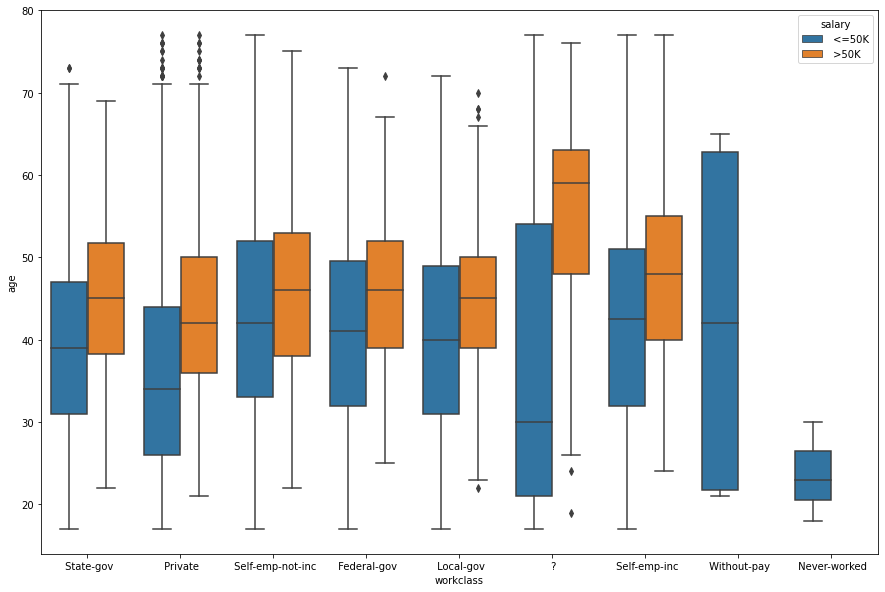

In [143]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['workclass'],y=df['age'],hue=df['salary'])

In [144]:
df.groupby(["workclass","salary"])['age'].mean()

workclass          salary
 ?                  <=50K    37.010063
                    >50K     54.271845
 Federal-gov        <=50K    41.008351
                    >50K     45.784566
 Local-gov          <=50K    40.262162
                    >50K     44.437376
 Never-worked       <=50K    23.666667
 Private            <=50K    35.904932
                    >50K     42.884066
 Self-emp-inc       <=50K    42.842657
                    >50K     48.384615
 Self-emp-not-inc   <=50K    42.877800
                    >50K     45.853012
 State-gov          <=50K    39.477306
                    >50K     45.003546
 Without-pay        <=50K    42.500000
Name: age, dtype: float64

In [145]:
label_df=df.groupby(["workclass","salary"])['age'].mean().sort_values().index

In [146]:
val_df=df.groupby(["workclass","salary"])['age'].mean().sort_values().values

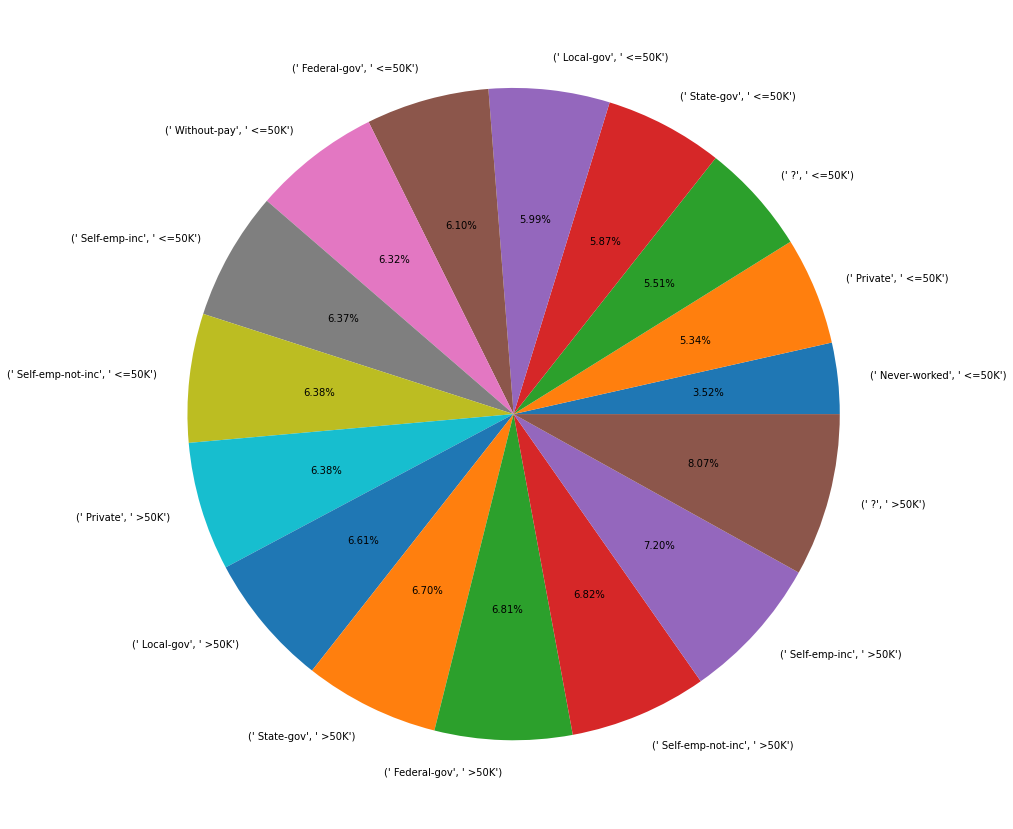

In [147]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='education', ylabel='age'>

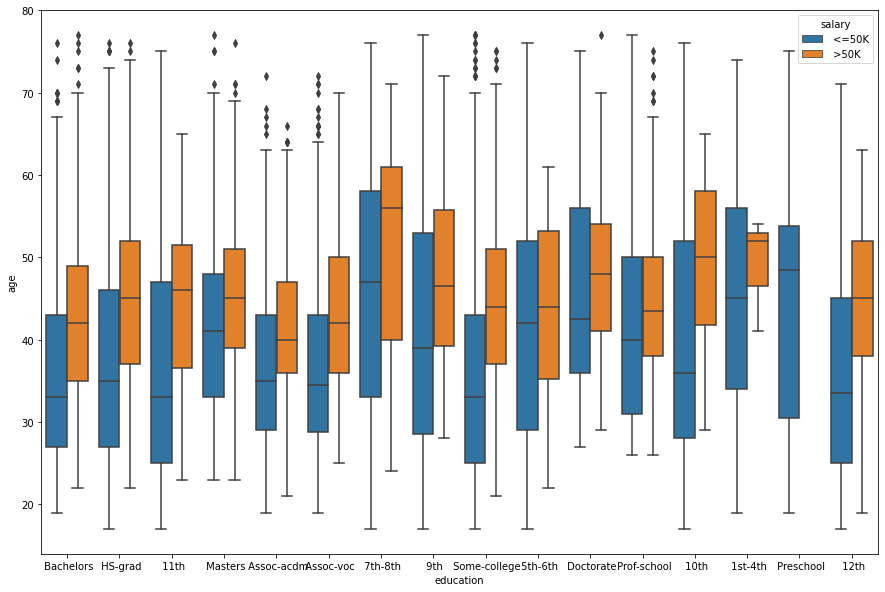

In [148]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['education'],y=df['age'],hue=df['salary'])

In [149]:
df.groupby(["education","salary"])['age'].mean()

education      salary
 10th           <=50K    38.904135
                >50K     48.895833
 11th           <=50K    35.897611
                >50K     43.808511
 12th           <=50K    35.788136
                >50K     43.080000
 1st-4th        <=50K    44.663366
                >50K     49.000000
 5th-6th        <=50K    41.726872
                >50K     44.000000
 7th-8th        <=50K    45.550000
                >50K     51.400000
 9th            <=50K    40.564841
                >50K     47.181818
 Assoc-acdm     <=50K    36.439114
                >50K     41.516279
 Assoc-voc      <=50K    36.503846
                >50K     42.856140
 Bachelors      <=50K    35.546020
                >50K     42.486551
 Doctorate      <=50K    45.550000
                >50K     48.085561
 HS-grad        <=50K    37.182900
                >50K     45.019335
 Masters        <=50K    41.279245
                >50K     45.045977
 Preschool      <=50K    43.500000
 Prof-school    <=50K    41.96470

In [150]:
label_df=df.groupby(["education","salary"])['age'].mean().sort_values().index

In [151]:
val_df=df.groupby(["education","salary"])['age'].mean().sort_values().values

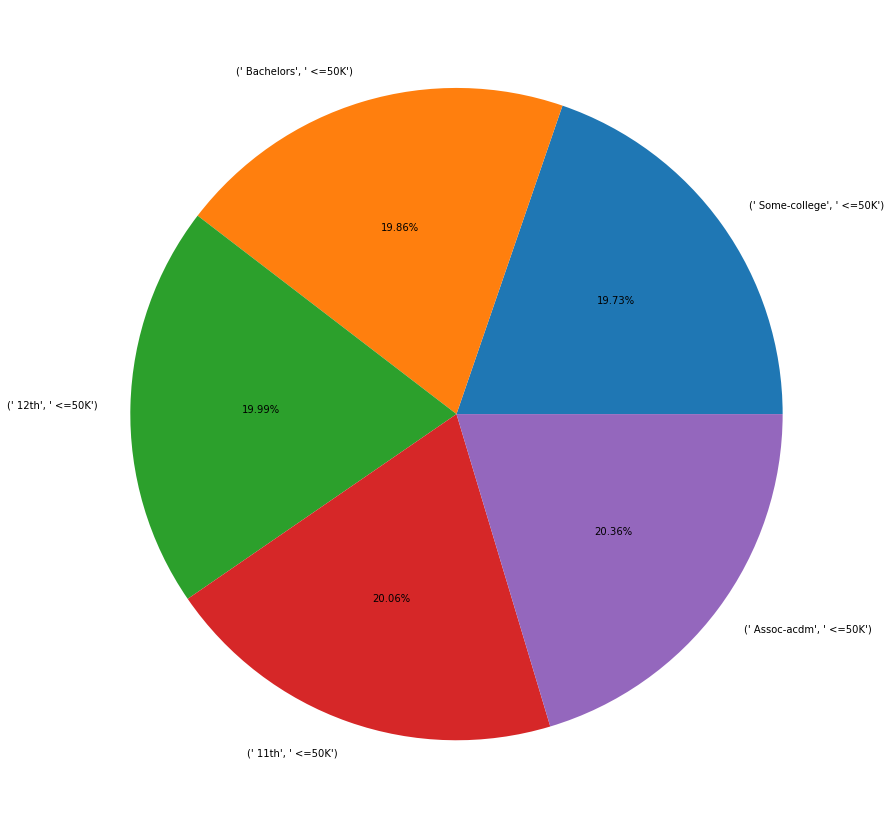

In [152]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='marital-status', ylabel='age'>

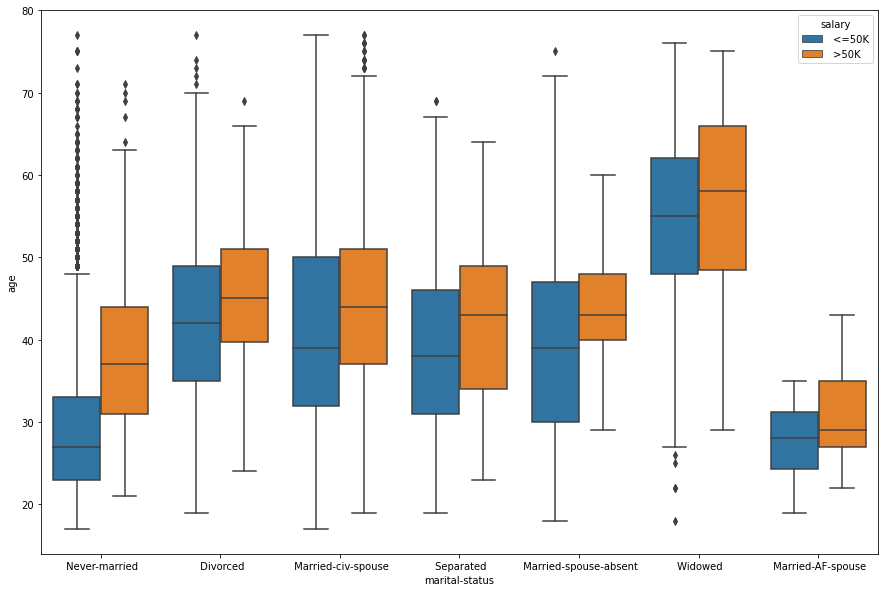

In [153]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['marital-status'],y=df['age'],hue=df['salary'])

In [154]:
df.groupby(["marital-status","salary"])['age'].mean()

marital-status          salary
 Divorced                <=50K    42.390204
                         >50K     45.639535
 Married-AF-spouse       <=50K    27.500000
                         >50K     31.000000
 Married-civ-spouse      <=50K    41.014498
                         >50K     44.221532
 Married-spouse-absent   <=50K    39.483871
                         >50K     44.789474
 Never-married           <=50K    29.216132
                         >50K     38.226891
 Separated               <=50K    38.768902
                         >50K     42.306122
 Widowed                 <=50K    54.526860
                         >50K     56.966102
Name: age, dtype: float64

In [155]:
label_df=df.groupby(["marital-status","salary"])['age'].mean().sort_values().index

In [156]:
val_df=df.groupby(["marital-status","salary"])['age'].mean().sort_values().values

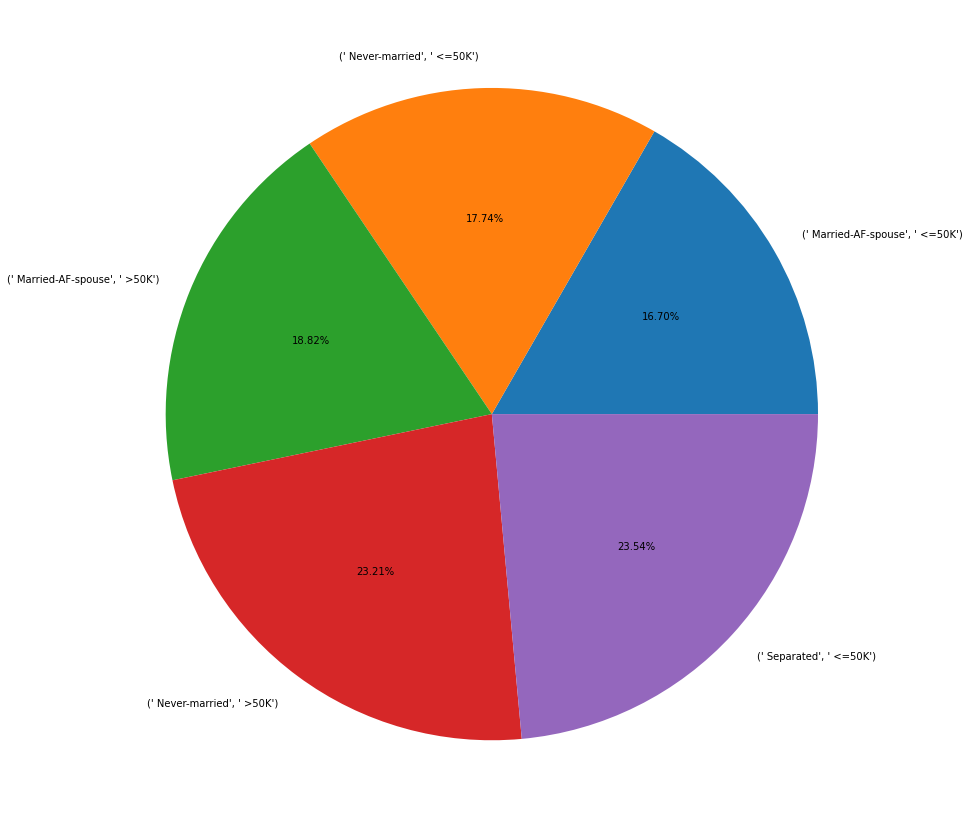

In [157]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='occupation', ylabel='age'>

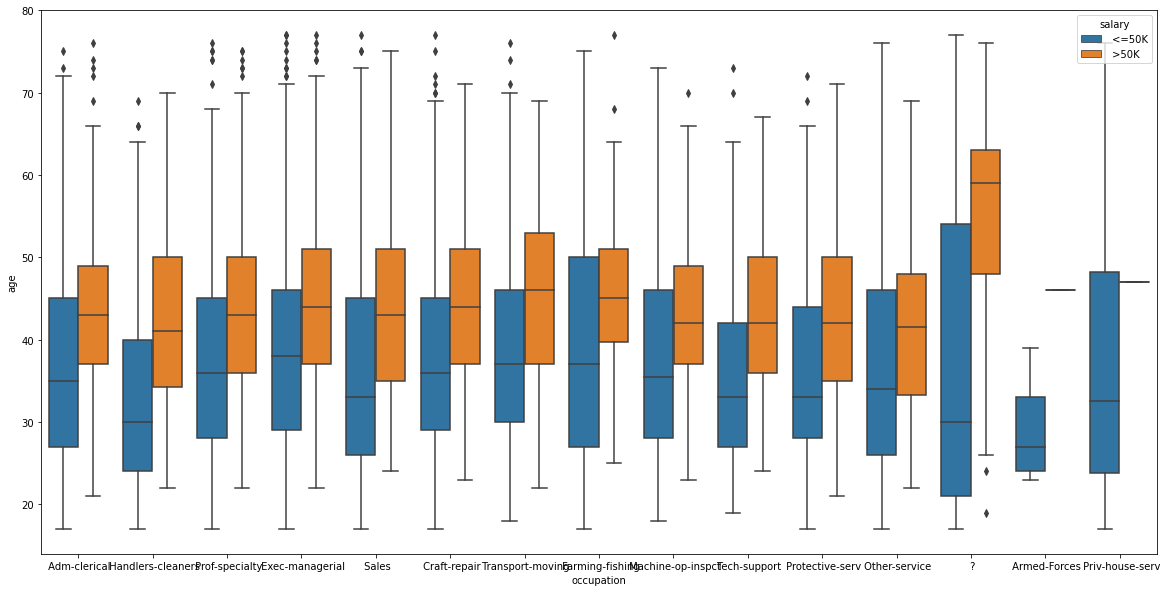

In [158]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['occupation'],y=df['age'],hue=df['salary'])

In [159]:
df.groupby(["occupation","salary"])['age'].mean()

occupation          salary
 ?                   <=50K    36.959900
                     >50K     54.271845
 Adm-clerical        <=50K    36.863673
                     >50K     43.240000
 Armed-Forces        <=50K    29.000000
                     >50K     46.000000
 Craft-repair        <=50K    37.558482
                     >50K     44.010283
 Exec-managerial     <=50K    38.913406
                     >50K     44.762208
 Farming-fishing     <=50K    39.216942
                     >50K     45.980769
 Handlers-cleaners   <=50K    32.659502
                     >50K     42.540541
 Machine-op-inspct   <=50K    37.227577
                     >50K     42.731278
 Other-service       <=50K    36.431350
                     >50K     41.833333
 Priv-house-serv     <=50K    37.171875
                     >50K     47.000000
 Prof-specialty      <=50K    37.667087
                     >50K     43.542816
 Protective-serv     <=50K    36.640379
                     >50K     42.127389
 Sales       

In [160]:
label_df=df.groupby(["occupation","salary"])['age'].mean().sort_values().index

In [161]:
val_df=df.groupby(["occupation","salary"])['age'].mean().sort_values().values

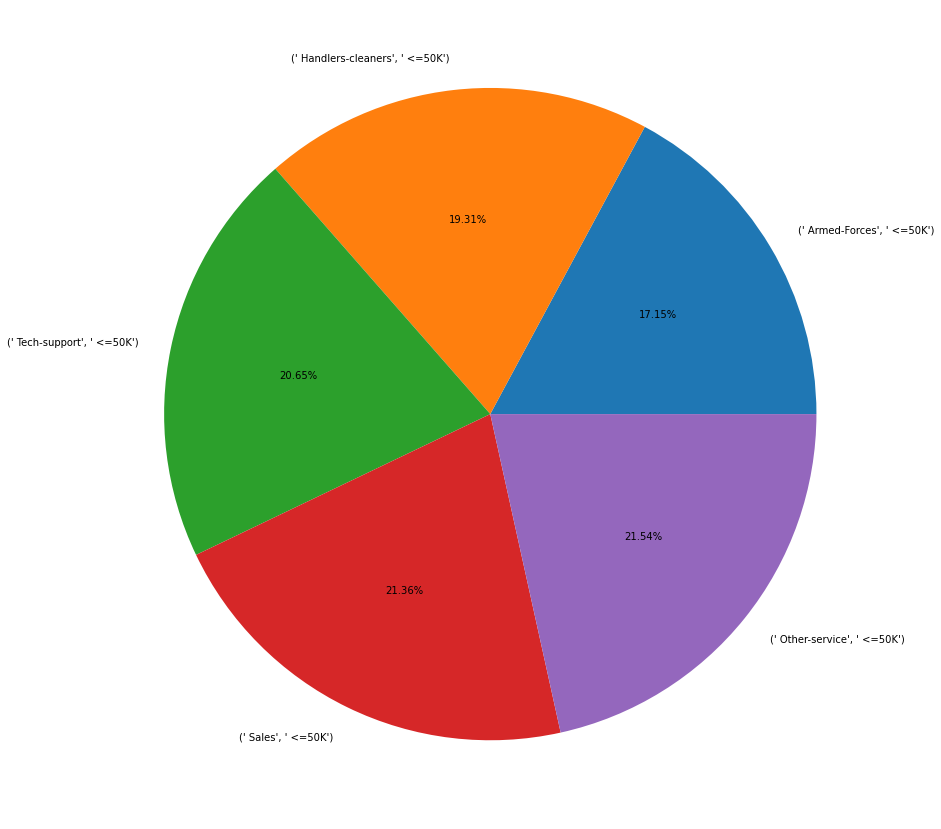

In [162]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='age'>

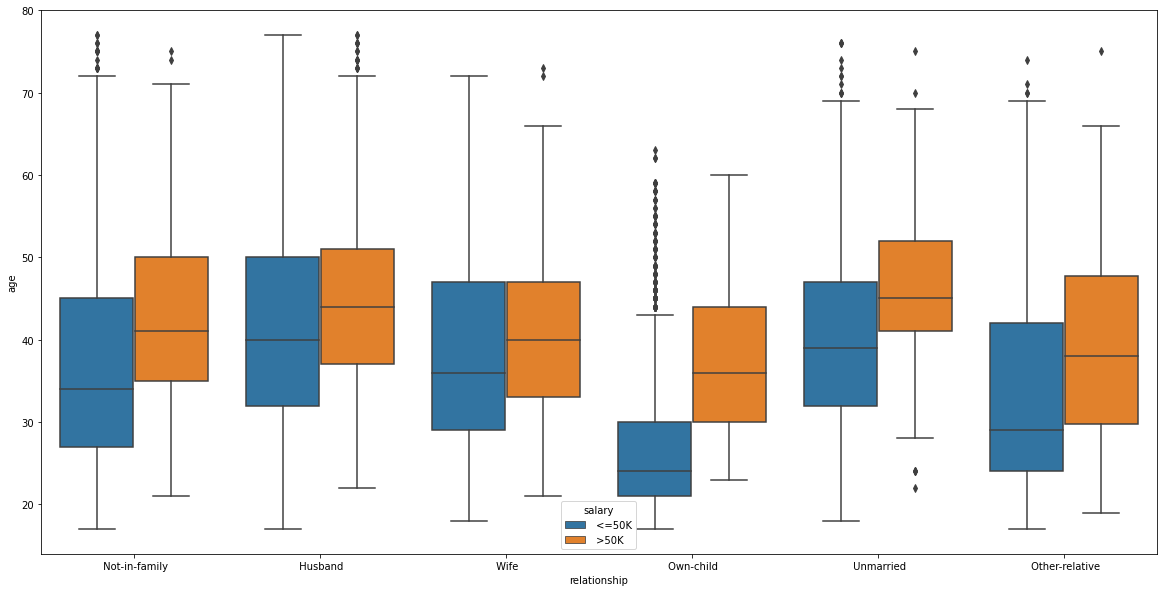

In [163]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['relationship'],y=df['age'],hue=df['salary'])

In [164]:
df.groupby(["relationship","salary"])['age'].mean()

relationship     salary
 Husband          <=50K    41.508723
                  >50K     44.712703
 Not-in-family    <=50K    36.902284
                  >50K     42.648208
 Other-relative   <=50K    33.532154
                  >50K     39.366667
 Own-child        <=50K    26.805832
                  >50K     37.113208
 Unmarried        <=50K    39.704261
                  >50K     45.962963
 Wife             <=50K    38.239252
                  >50K     40.404059
Name: age, dtype: float64

In [165]:
label_df=df.groupby(["relationship","salary"])['age'].mean().sort_values().index

In [166]:
val_df=df.groupby(["relationship","salary"])['age'].mean().sort_values().values

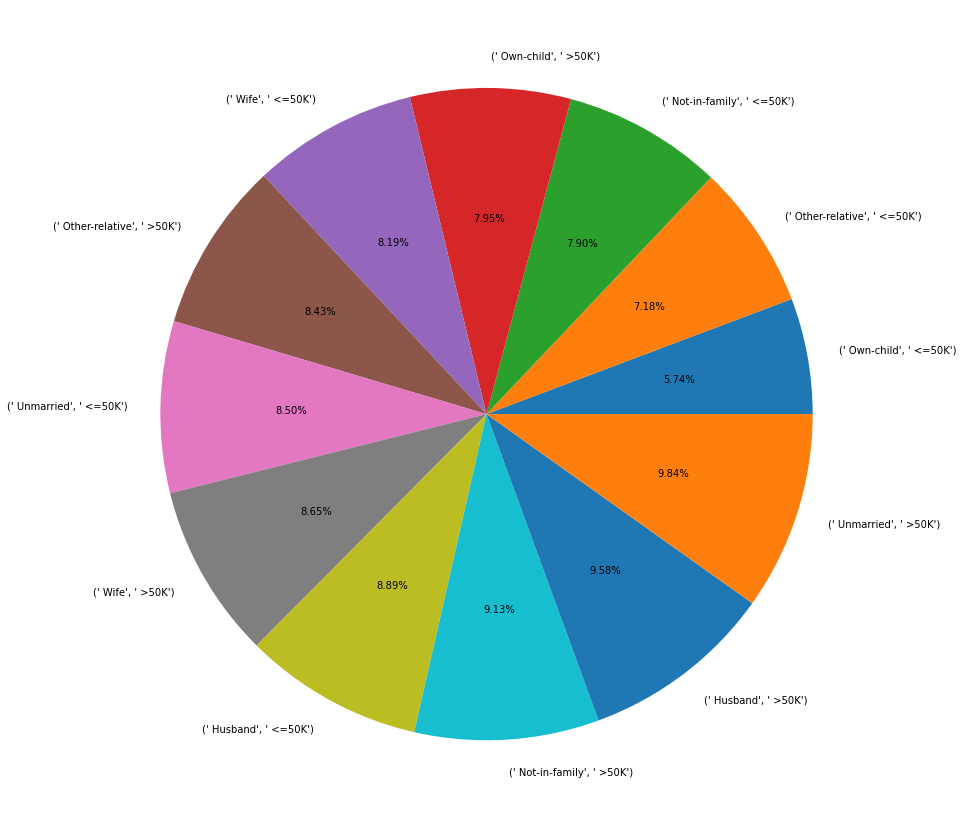

In [167]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='race', ylabel='age'>

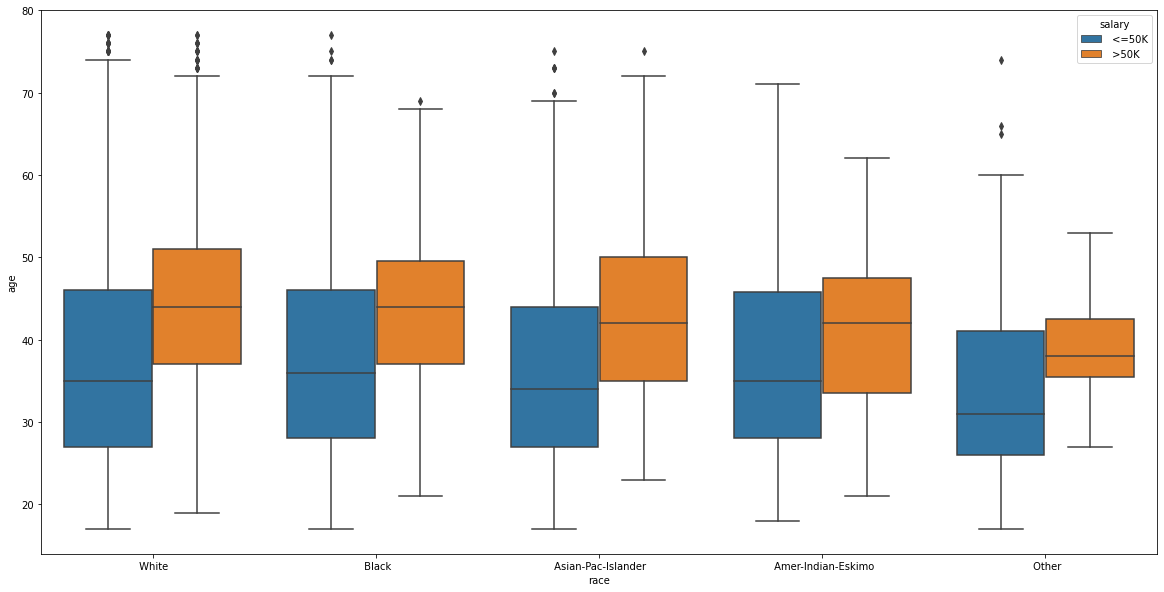

In [168]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['race'],y=df['age'],hue=df['salary'])

In [169]:
df.groupby(["race","salary"])['age'].mean()

race                 salary
 Amer-Indian-Eskimo   <=50K    37.301980
                      >50K     40.851852
 Asian-Pac-Islander   <=50K    36.343284
                      >50K     42.657407
 Black                <=50K    37.676471
                      >50K     43.759322
 Other                <=50K    33.486188
                      >50K     39.052632
 White                <=50K    37.035095
                      >50K     44.138193
Name: age, dtype: float64

In [170]:
label_df=df.groupby(["race","salary"])['age'].mean().sort_values().index

In [171]:
val_df=df.groupby(["race","salary"])['age'].mean().sort_values().values

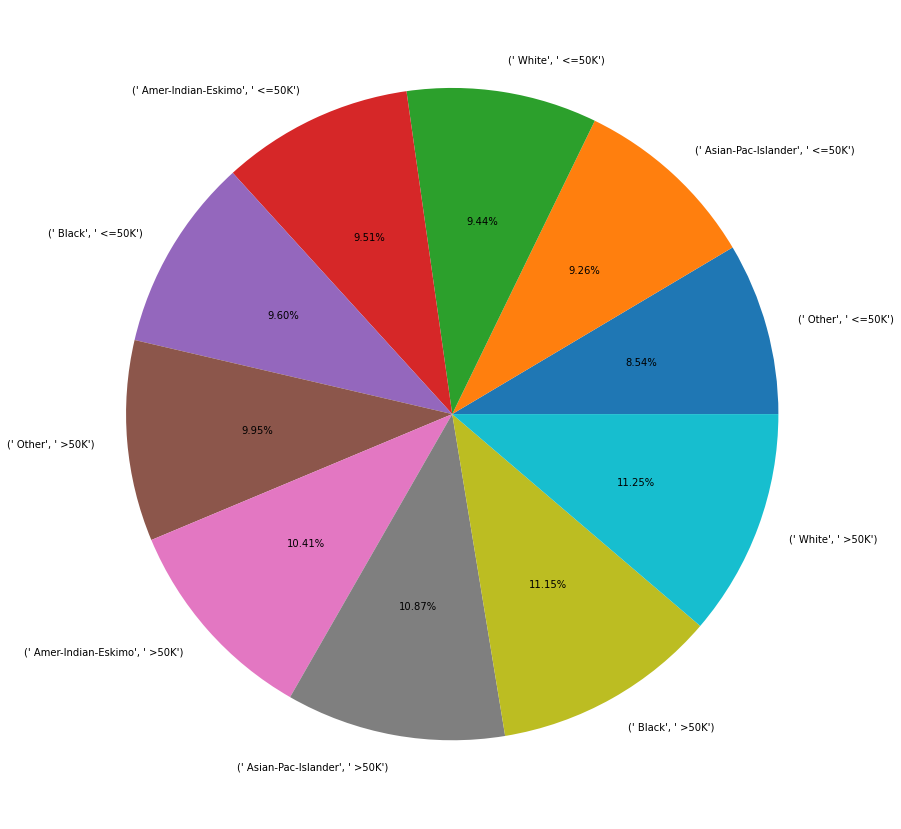

In [172]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='native-country', ylabel='age'>

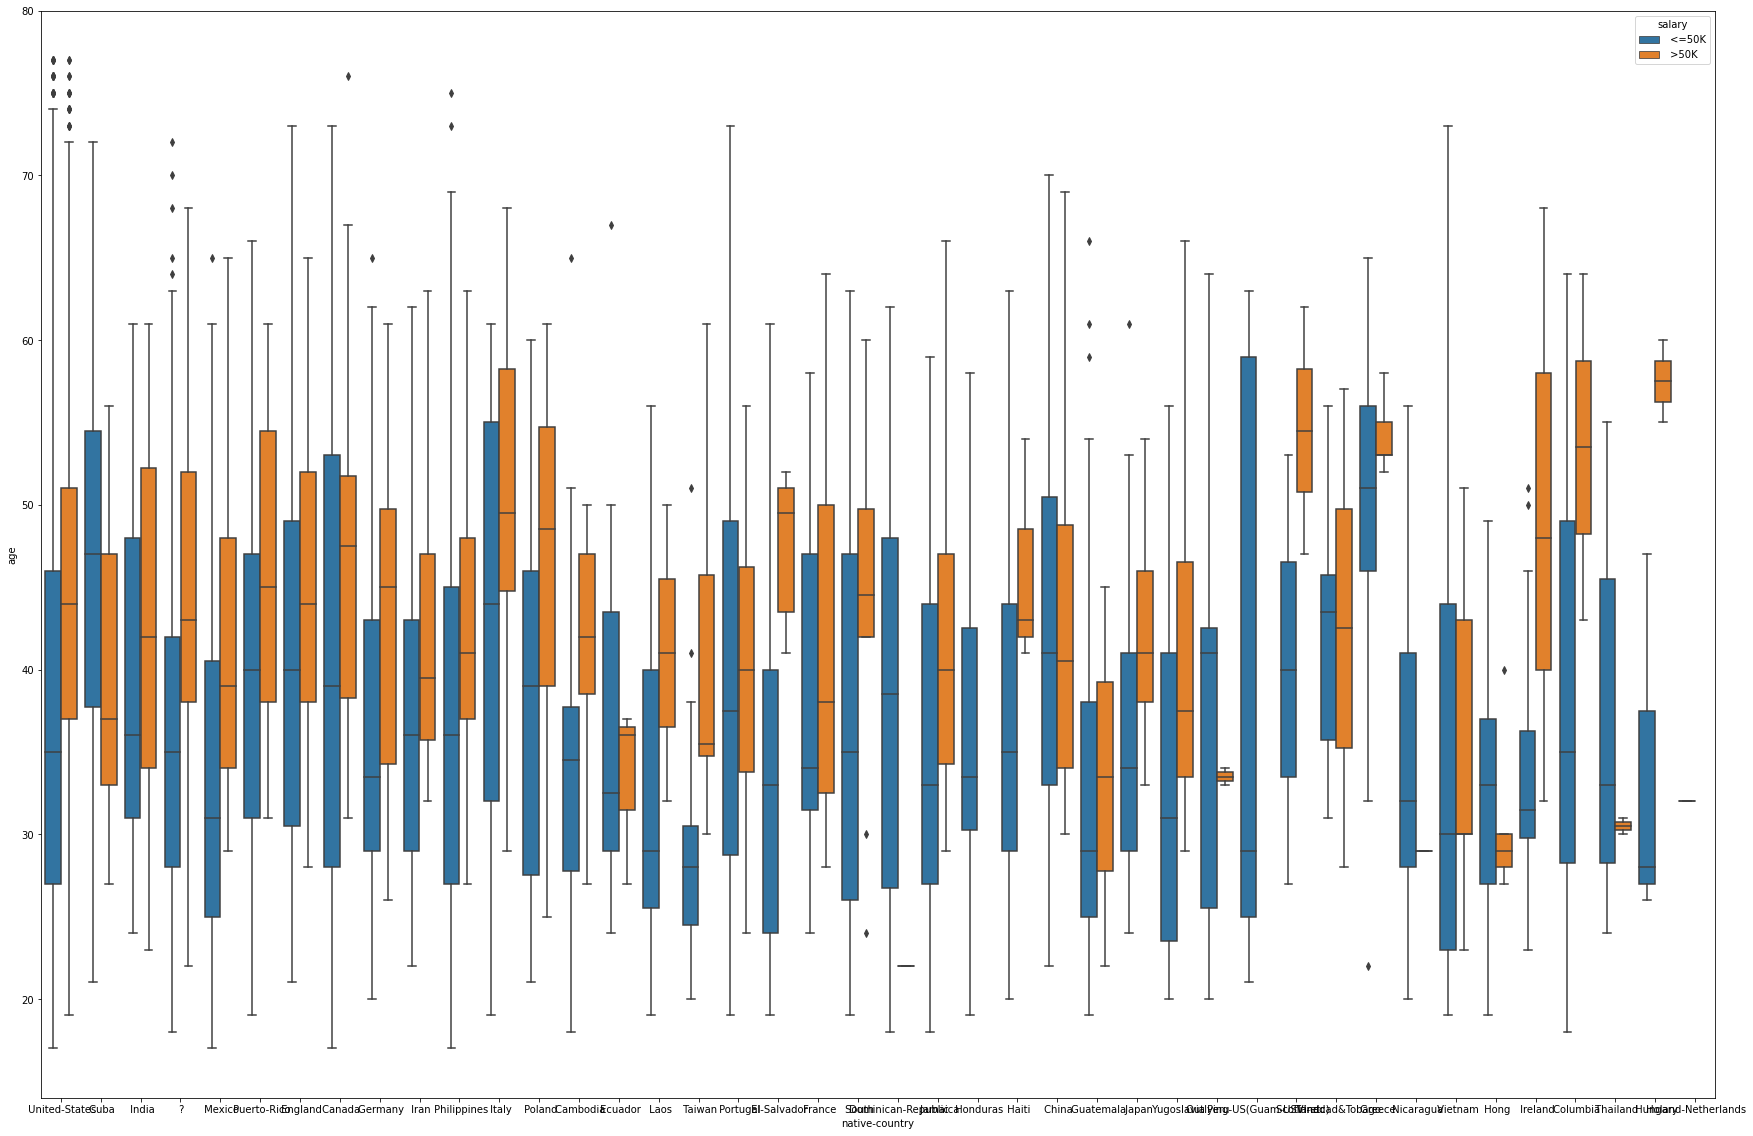

In [173]:
plt.figure(figsize=(30,20))
sns.boxplot(x=df['native-country'],y=df['age'],hue=df['salary'])


In [174]:
df.groupby(["native-country","salary"])['age'].mean()

native-country  salary
 ?               <=50K    36.539735
                 >50K     44.467890
 Cambodia        <=50K    35.666667
                 >50K     41.428571
 Canada          <=50K    40.634615
                            ...    
 United-States   >50K     44.088605
 Vietnam         <=50K    34.319149
                 >50K     35.400000
 Yugoslavia      <=50K    33.714286
                 >50K     42.500000
Name: age, Length: 81, dtype: float64

In [175]:
label_df=df.groupby(["native-country","salary"])['age'].mean().sort_values().index

In [176]:
val_df=df.groupby(["native-country","salary"])['age'].mean().sort_values().values

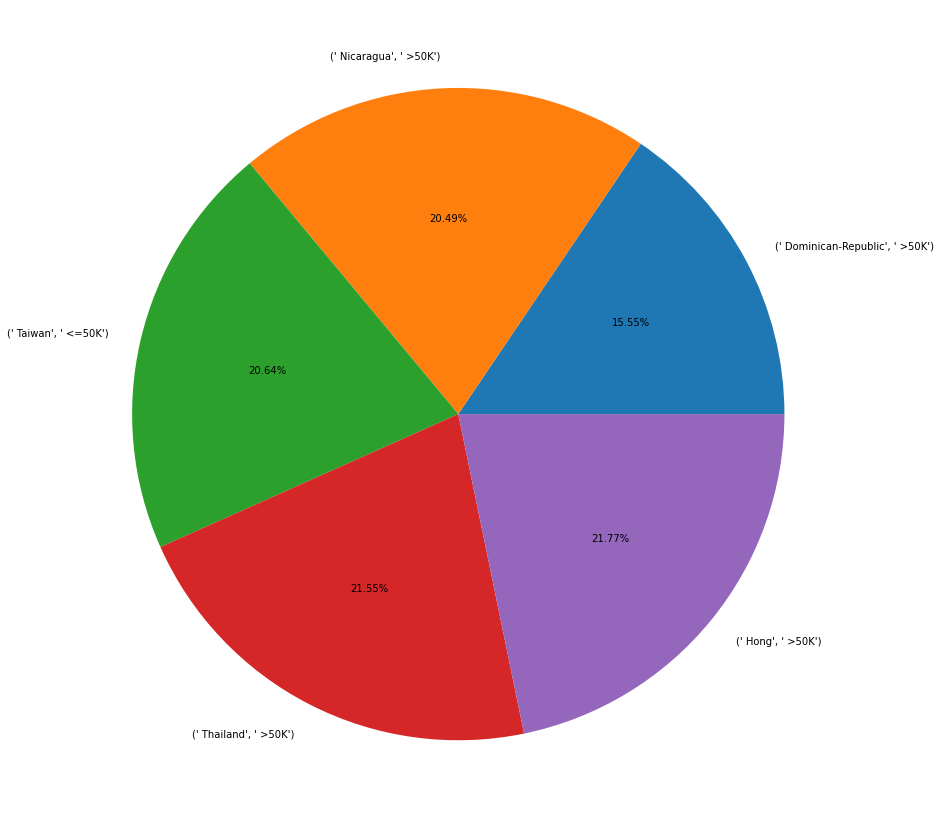

In [177]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

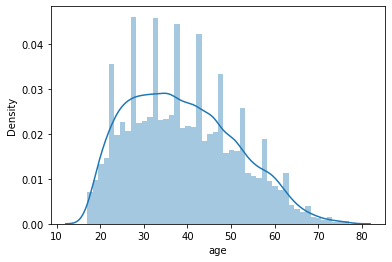

In [178]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

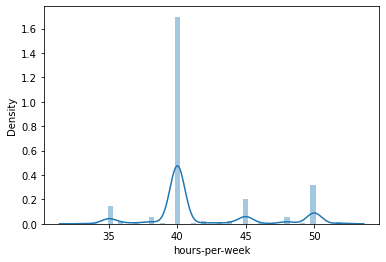

In [179]:
sns.distplot(df['hours-per-week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

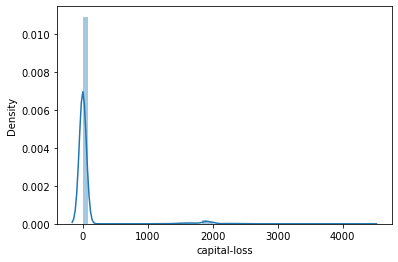

In [180]:
sns.distplot(df['capital-loss'])

In [181]:
df['capital-loss']=np.log(df['capital-loss'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [182]:
df=df[df['capital-loss']>0]



C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

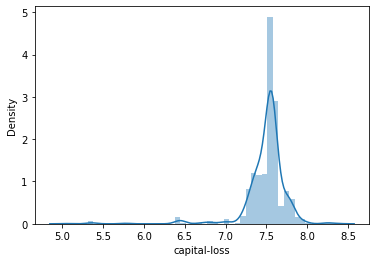

In [183]:
sns.distplot(df['capital-loss'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

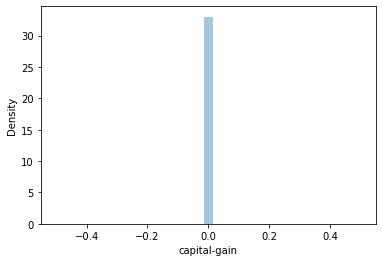

In [184]:
sns.distplot(df['capital-gain'])


In [185]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,7.621685,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,7.249926,40,United-States,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,7.360740,35,?,<=50K
112,56,Self-emp-not-inc,335605,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,7.542744,50,Canada,>50K
131,24,Private,43323,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,7.474205,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,53,Local-gov,186303,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,7.542744,40,United-States,>50K
32416,33,Private,191335,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,7.550661,50,United-States,>50K
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,7.542744,45,United-States,>50K
32445,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,7.419980,50,United-States,<=50K


In [186]:
le=LabelEncoder()


In [187]:
df['workclass']=le.fit_transform(df['workclass'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\1857712185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=le.fit_transform(df['workclass'])


In [188]:
df['education']=le.fit_transform(df['education'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\1505087453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=le.fit_transform(df['education'])


In [189]:
df['marital-status']=le.fit_transform(df['marital-status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\2062021258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status']=le.fit_transform(df['marital-status'])


In [190]:
df['occupation']=le.fit_transform(df['occupation'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\1622587964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=le.fit_transform(df['occupation'])


In [191]:

df['relationship']=le.fit_transform(df['relationship'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\3820658583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship']=le.fit_transform(df['relationship'])


In [192]:
df['race']=le.fit_transform(df['race'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\2002995246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race']=le.fit_transform(df['race'])


In [193]:
df['sex']=le.fit_transform(df['sex'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\1340687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])


In [194]:
df['native-country']=le.fit_transform(df['native-country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\346732915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country']=le.fit_transform(df['native-country'])


In [195]:
df['salary']=le.fit_transform(df['salary'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_39708\1876097155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary']=le.fit_transform(df['salary'])


In [196]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23,43,3,117037,1,7,1,13,0,4,1,0,7.621685,40,27,0
32,45,3,386940,9,13,0,4,3,4,1,0,7.249926,40,27,0
93,30,3,117747,11,9,1,11,5,1,0,0,7.360740,35,0,0
112,56,5,335605,11,9,1,8,0,4,1,0,7.542744,50,2,1
131,24,3,43323,11,9,3,8,1,4,0,0,7.474205,40,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,53,2,186303,15,10,1,10,0,4,1,0,7.542744,40,27,1
32416,33,3,191335,7,12,1,3,0,4,1,0,7.550661,50,27,1
32441,53,3,304504,15,10,1,13,0,4,1,0,7.542744,45,27,1
32445,61,3,190682,11,9,5,3,1,2,0,0,7.419980,50,27,0


In [197]:
y=df['salary']

In [198]:
X=df.drop('salary',axis=1)

In [199]:
sc=StandardScaler()


In [200]:
X=sc.fit_transform(X)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [202]:
X_train.shape

(874, 14)

In [203]:
y_train.shape

(874,)

In [204]:
lr=LogisticRegression()

In [205]:
lr.fit(X_train,y_train)

LogisticRegression()

In [206]:
y_pred=lr.predict(X_test)


In [207]:
accuracy_score(y_test,y_pred)

0.7351598173515982

In [208]:
mean_squared_error(y_test,y_pred)

0.2648401826484018

In [209]:
confusion_matrix(y_test,y_pred)

array([[69, 28],
       [30, 92]], dtype=int64)

In [210]:
rfc=RandomForestClassifier()


In [211]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [212]:
y_pred=rfc.predict(X_test)


In [213]:
accuracy_score(y_test,y_pred)

0.9041095890410958

In [214]:
mean_squared_error(y_test,y_pred)

0.0958904109589041

In [215]:
confusion_matrix(y_test,y_pred)

array([[ 92,   5],
       [ 16, 106]], dtype=int64)

In [216]:
dtc=DecisionTreeClassifier()


In [217]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [218]:
y_pred=dtc.predict(X_test)


In [219]:
accuracy_score(y_test,y_pred)

0.9041095890410958

In [220]:
mean_squared_error(y_test,y_pred)

0.0958904109589041

In [221]:
confusion_matrix(y_test,y_pred)

array([[ 87,  10],
       [ 11, 111]], dtype=int64)

In [222]:
knc=KNeighborsClassifier()


In [223]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [224]:
y_pred=knc.predict(X_test)


In [225]:
accuracy_score(y_test,y_pred)

0.6894977168949772

In [226]:
mean_squared_error(y_test,y_pred)

0.3105022831050228

In [227]:
confusion_matrix(y_test,y_pred)

array([[63, 34],
       [34, 88]], dtype=int64)

In [228]:
xgb=XGBClassifier()


In [229]:
xgb.fit(X_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [230]:
y_pred=xgb.predict(X_test)

In [231]:
accuracy_score(y_test,y_pred)

1.0

In [232]:
mean_squared_error(y_test,y_pred)

0.0

In [233]:
confusion_matrix(y_test,y_pred)

array([[ 97,   0],
       [  0, 122]], dtype=int64)